In [29]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import random as rm
import time as tm
import matplotlib.pyplot as plt
from scipy import stats
from pandas.api.types import is_string_dtype 
from pandas.api.types import is_numeric_dtype 
import sklearn.metrics as skm
import sklearn.impute as ski
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import math
import scipy.stats as stats
import statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')


In [30]:
df1 = pd.read_csv('finalreport_featureselection_allstates.csv', index_col=0)
df1.index = pd.to_datetime(df1.index)
df1 = df1.sort_index()
df1

,new_cases_10_min,income_support,contact_tracing,personal_income,Booster_Doses_12to18,new_cases_2_lag,restrictions_on_internal_movement,testing_policy,facial_coverings,debt_relief,...,new_cases_50_max,Booster_Doses_18to50,vaccination_policy,Series_Complete_12Pto18,vaccination_rate_1dose,maximum_temperature_celsius,Administered_Dose1_Recip_12to18,PEOPLE_POSITIVE_NEW_CASES_COUNT,PROVINCE_STATE_NAME,STATE
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,5.0,0.0,1.0,3592144,0.0,186.0,0.5,2.0,0.5,1.0,...,1046.0,0.0,2.5,0.0,0.000000,26.848765,0.0,5,California,0
2020-03-01,0.0,0.0,1.0,3884676,0.0,3346.0,0.0,1.0,0.0,0.0,...,6527.0,0.0,0.0,0.0,0.000000,8.644444,0.0,0,Michigan,9
2020-03-01,0.0,0.0,1.0,6576964,0.0,0.0,0.5,1.5,0.5,0.5,...,36371.0,0.0,2.5,0.0,0.000000,24.047223,0.0,0,Georgia,8
2020-03-01,0.0,0.0,1.0,3069715,0.0,615.0,0.5,2.0,1.0,0.5,...,615.0,0.0,2.5,0.0,0.000000,19.000000,0.0,0,New York,3
2020-03-01,0.0,0.0,1.0,4549547,0.0,6434.0,0.5,2.0,1.0,0.0,...,6434.0,0.0,2.5,0.0,0.000000,13.566667,0.0,0,North Carolina,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,0.0,0.0,1.0,7172580,52690.0,5594.0,1.0,3.0,2.0,1.0,...,8887.0,670159.0,5.0,333112.0,0.546644,26.783333,404998.0,0,Georgia,8
2022-04-29,0.0,0.0,1.0,3671683,122641.0,0.0,1.0,3.0,1.0,1.0,...,36371.0,1487009.0,5.0,797059.0,0.753405,29.866667,955836.0,0,Florida,4
2022-04-29,0.0,0.0,1.0,3888196,632287.0,1852.0,1.0,3.0,2.0,1.0,...,18896.0,6084195.0,5.0,2185351.0,0.819798,24.544444,2472156.0,18896,California,0


# XGBoost

In [31]:
df_train = df1.iloc[:6320]
df_test = df1.iloc[6320:]

## Base model

In [32]:
X_train = df_train.drop(columns=['PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PROVINCE_STATE_NAME'])
X_train = X_train.sort_index()
y_train = df_train['PEOPLE_POSITIVE_NEW_CASES_COUNT']
y_train = y_train.sort_index()

X_test = df_test.drop(columns=['PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PROVINCE_STATE_NAME'])
X_test = X_test.sort_index()
y_test = df_test['PEOPLE_POSITIVE_NEW_CASES_COUNT']
X_test = X_test.sort_index()

In [33]:
reg = xgb.XGBRegressor()
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:5249.14240	validation_1-rmse:26012.41025
[1]	validation_0-rmse:4023.99127	validation_1-rmse:24384.58411
[2]	validation_0-rmse:3155.69901	validation_1-rmse:22771.99719
[3]	validation_0-rmse:2549.68737	validation_1-rmse:21586.01943
[4]	validation_0-rmse:2144.05927	validation_1-rmse:21015.59188
[5]	validation_0-rmse:1861.92868	validation_1-rmse:20741.10016
[6]	validation_0-rmse:1668.76720	validation_1-rmse:20384.63888
[7]	validation_0-rmse:1527.17993	validation_1-rmse:20294.10058
[8]	validation_0-rmse:1429.07867	validation_1-rmse:20099.57859
[9]	validation_0-rmse:1352.24807	validation_1-rmse:20037.86605
[10]	validation_0-rmse:1291.13242	validation_1-rmse:20022.38211
[11]	validation_0-rmse:1244.12815	validation_1-rmse:19994.67311
[12]	validation_0-rmse:1198.47312	validation_1-rmse:19967.86850
[13]	validation_0-rmse:1170.41707	validation_1-rmse:19951.95397
[14]	validation_0-rmse:1135.19631	validation_1-rmse:19918.80214
[15]	validation_0-rmse:1101.41849	validation_1-rms

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

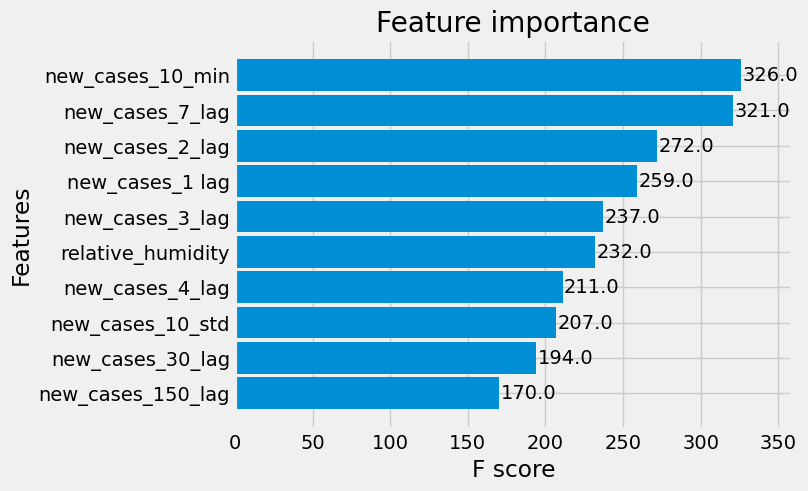

In [34]:
_ = plot_importance(reg, height=0.9 ,max_num_features = 10)

In [35]:
reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
df_test['Prediction'] = reg.predict(X_test)
df_test['Prediction'] = df_test['Prediction'].apply(lambda x: max(x, 0))

df = pd.concat([df_test, df_train], sort=False)

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_19234/3465353448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Prediction'] = reg.predict(X_test)
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_19234/3465353448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Prediction'] = df_test['Prediction'].apply(lambda x: max(x, 0))


In [37]:
state_mapping = {
    'California': 0,
    'Texas': 1,
    'Illinois': 2,
    'New York': 3,
    'Florida': 4,
    'Pennsylvania': 5,
    'Ohio': 6,
    'North Carolina': 7,
    'Georgia': 8,
    'Michigan': 9
}

df_CA = df[df['STATE'] == 0]
df_TX = df[df['STATE'] == 1]
df_IL = df[df['STATE'] == 2]
df_NY = df[df['STATE'] == 3]
df_FL = df[df['STATE'] == 4]
df_PA = df[df['STATE'] == 5]
df_OH = df[df['STATE'] == 6]
df_NC = df[df['STATE'] == 7]
df_GA = df[df['STATE'] == 8]
df_MI = df[df['STATE'] == 9]


Test RMSE:  28421.136647405063
Test MAE:  14817.9889213224
Test MASE: 0.7525269460151056


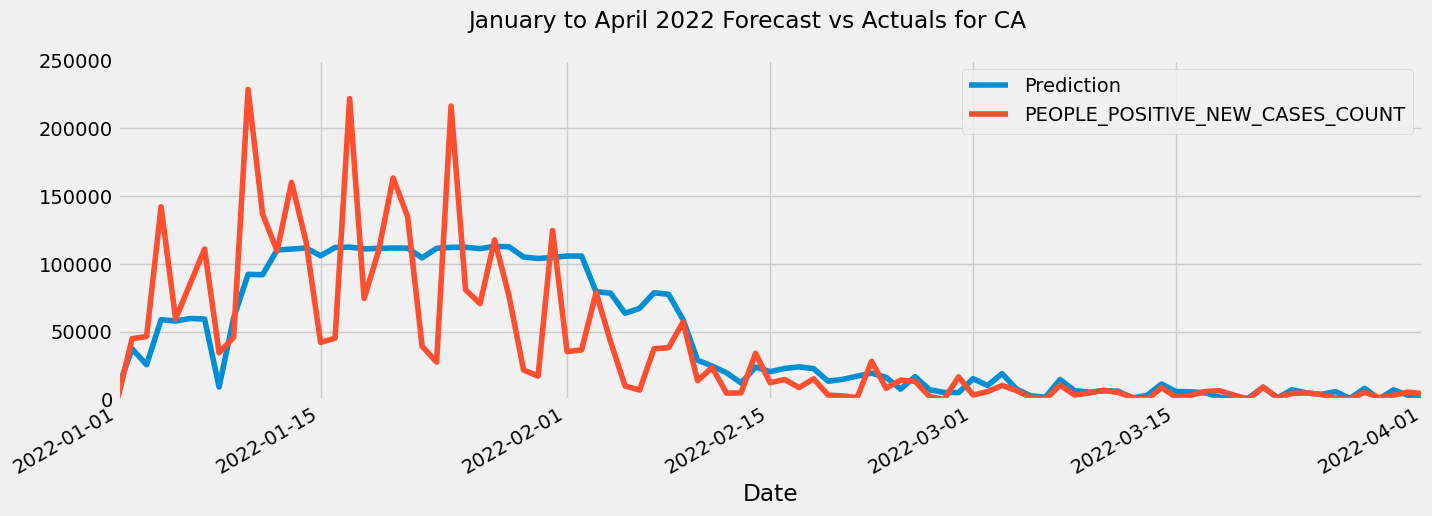

In [38]:
# Plot the forecast with the actuals
state = 'CA'
try_ = df_CA

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = try_[['Prediction','PEOPLE_POSITIVE_NEW_CASES_COUNT']].plot(ax=ax,
                                              style=['-','-'])
ax.set_xbound(lower='01-01-2022', upper='04-01-2022')
ax.set_ylim(0, 250000)
plot = plt.suptitle(f'January to April 2022 Forecast vs Actuals for {state}')

df_test_state = try_[try_['Prediction'].notna()]

model_rmse = mean_squared_error(df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test_state['Prediction'], squared=False)
model_mae = mean_absolute_error(df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test_state['Prediction'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)

actuals = df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT']
naive_forecasts = actuals.shift(1)  # Shift the actuals by one to get the naive forecast
mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])

# Calculate MASE
mase = model_mae / mae_naive

print(f'Test MASE: {mase}')

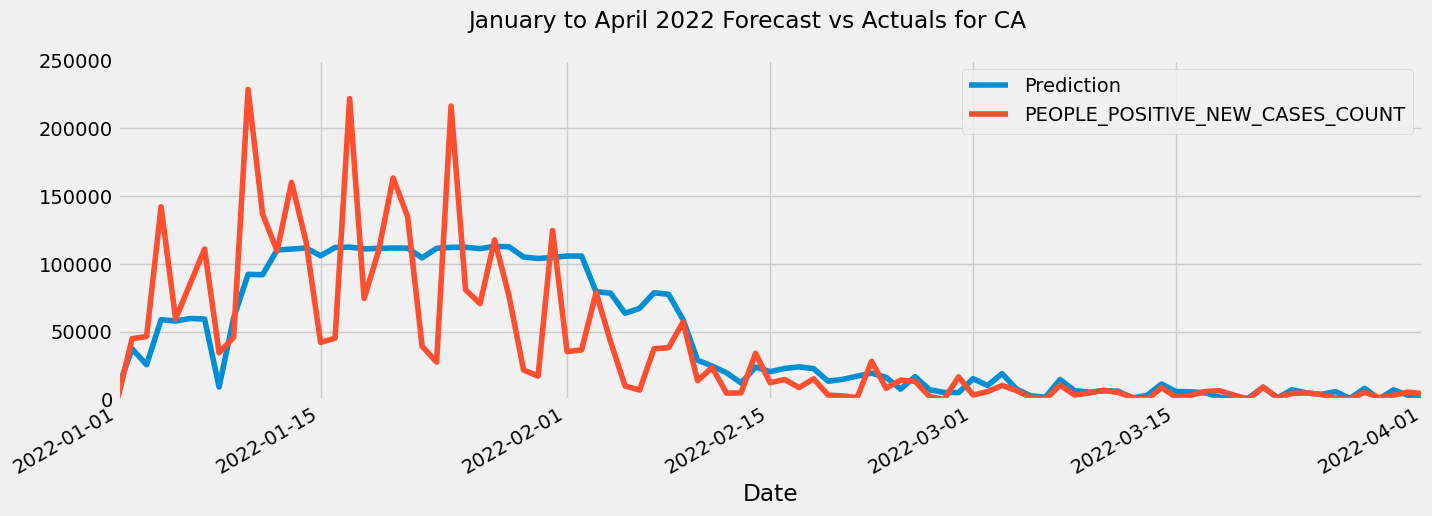

CA - Test RMSE:  28421.136647405063
CA - Test MAE:  14817.9889213224
CA - Test MASE: 0.7525269460151056


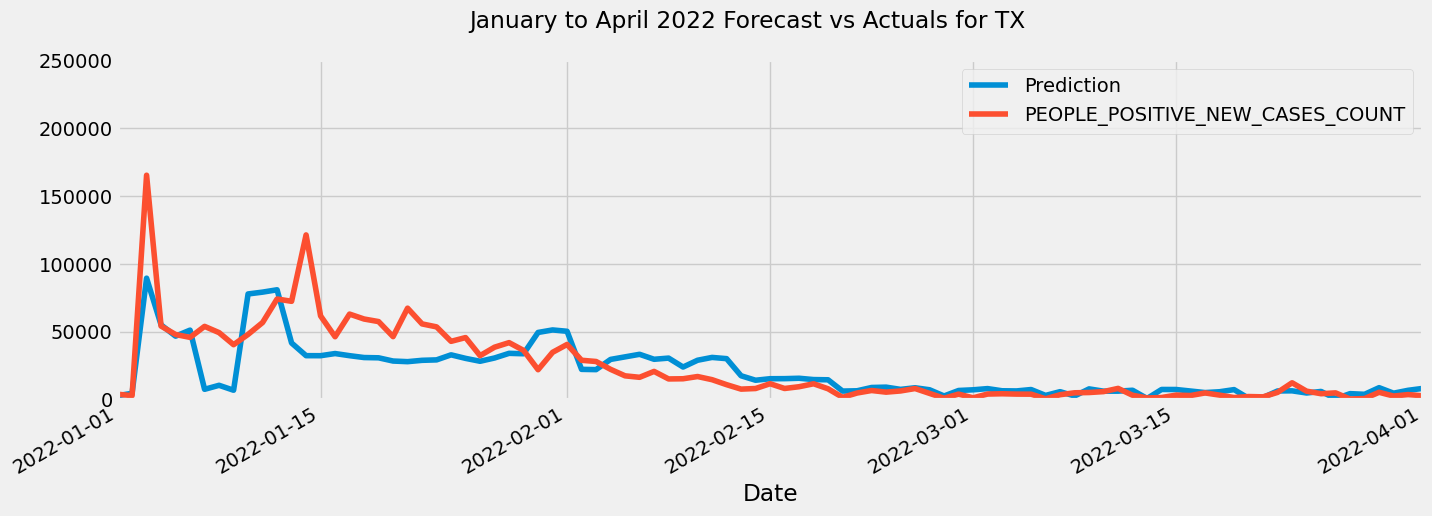

TX - Test RMSE:  14479.84359982242
TX - Test MAE:  7863.6078323171105
TX - Test MASE: 1.2506738473725394


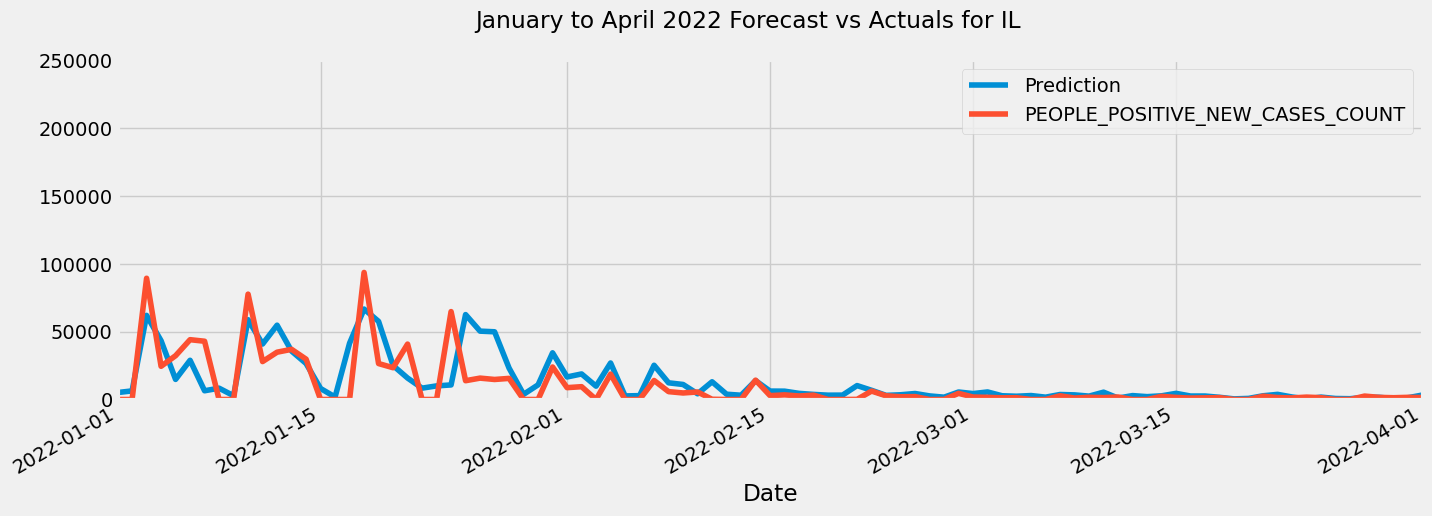

IL - Test RMSE:  11089.256277446873
IL - Test MAE:  5741.133607429794
IL - Test MASE: 0.667595430725396


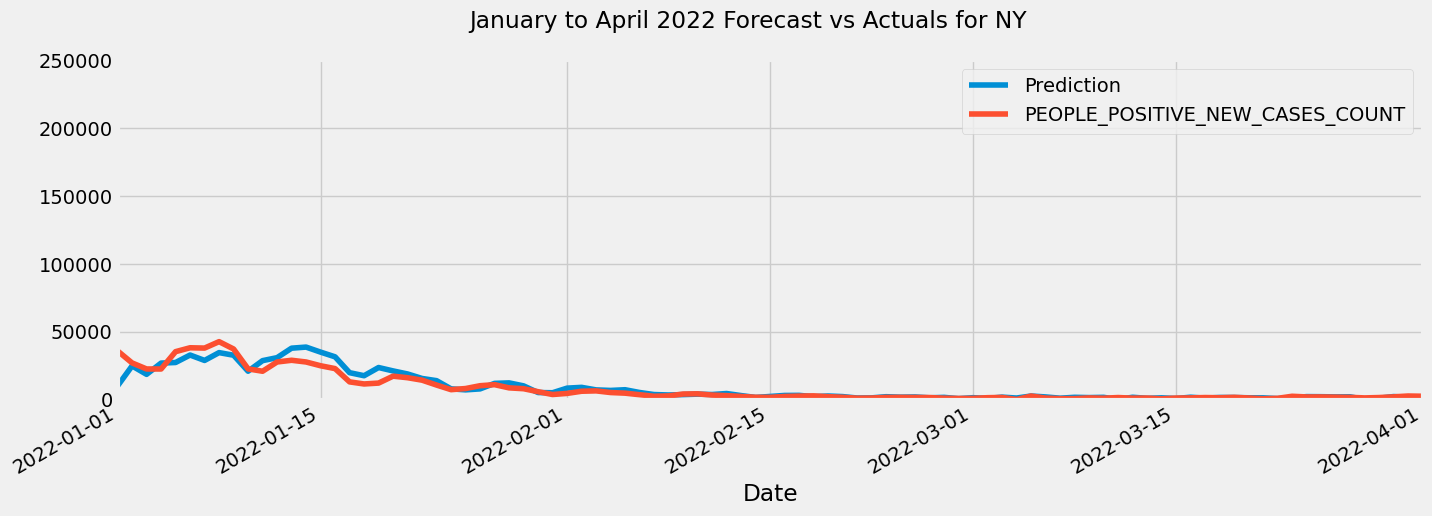

NY - Test RMSE:  3849.3327998345244
NY - Test MAE:  2109.0787464334994
NY - Test MASE: 1.1147500780704935


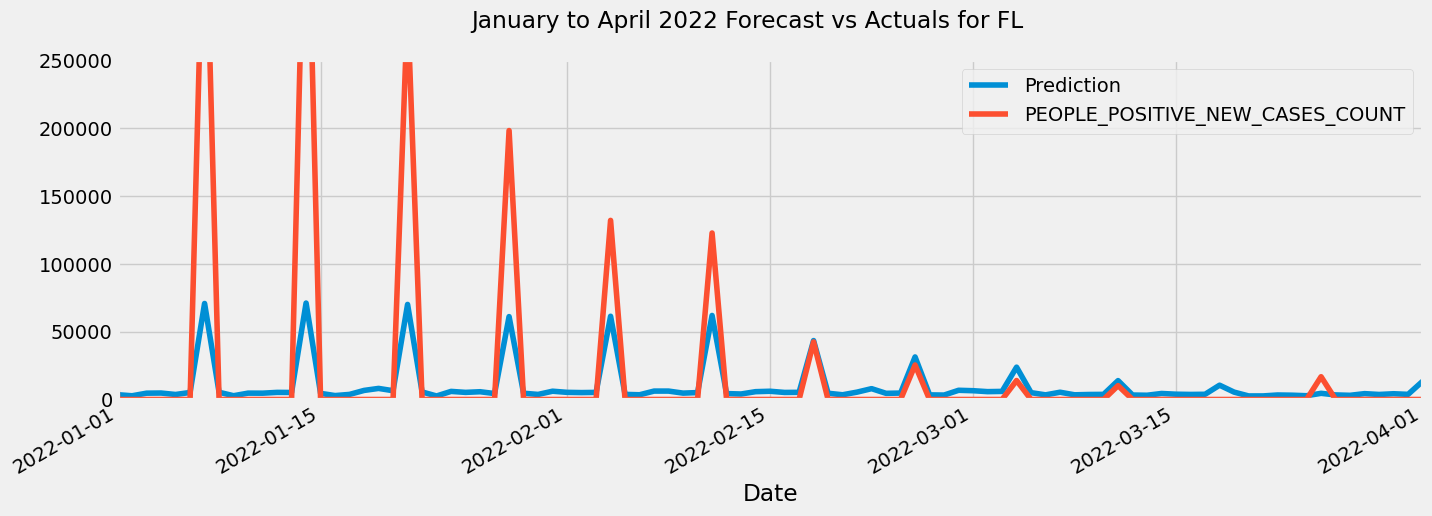

FL - Test RMSE:  48971.08715058053
FL - Test MAE:  13642.052517275268
FL - Test MASE: 0.48212337672669164


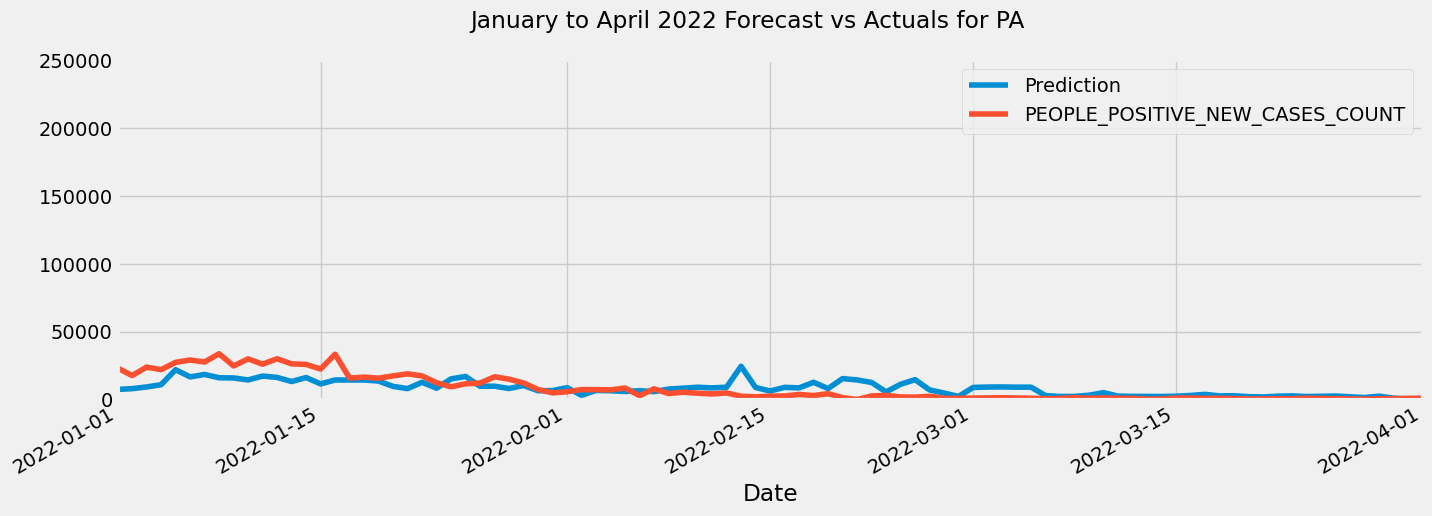

PA - Test RMSE:  5888.710456654107
PA - Test MAE:  3876.1679078114184
PA - Test MASE: 2.422855715664809


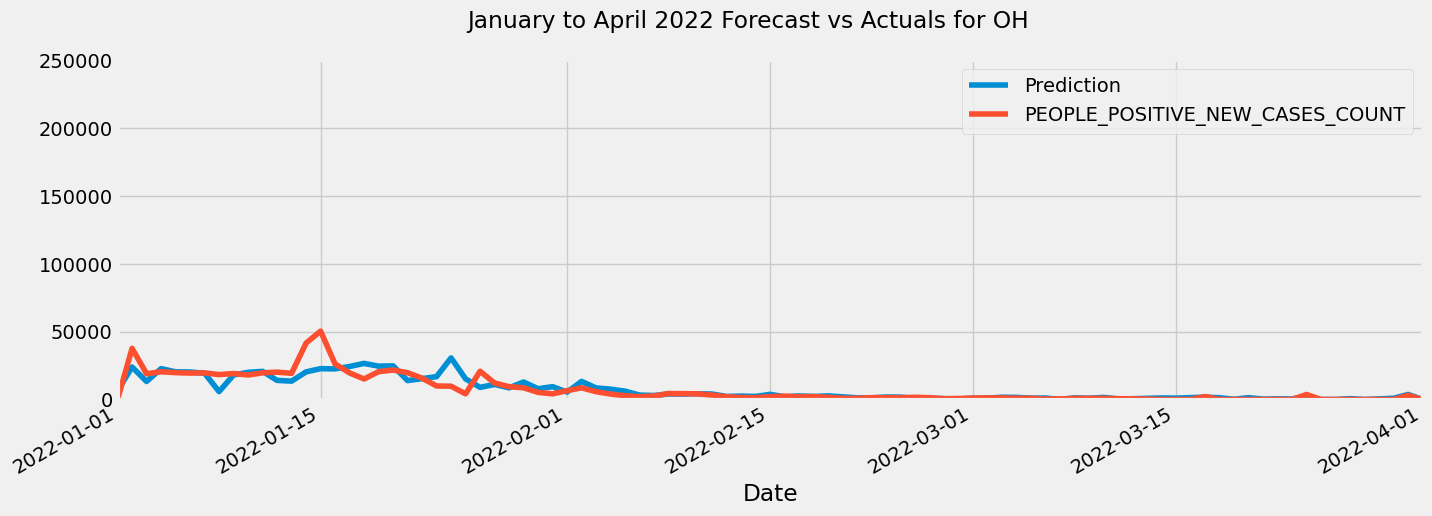

OH - Test RMSE:  4720.162464228795
OH - Test MAE:  2391.721062273919
OH - Test MASE: 0.8882680244433372


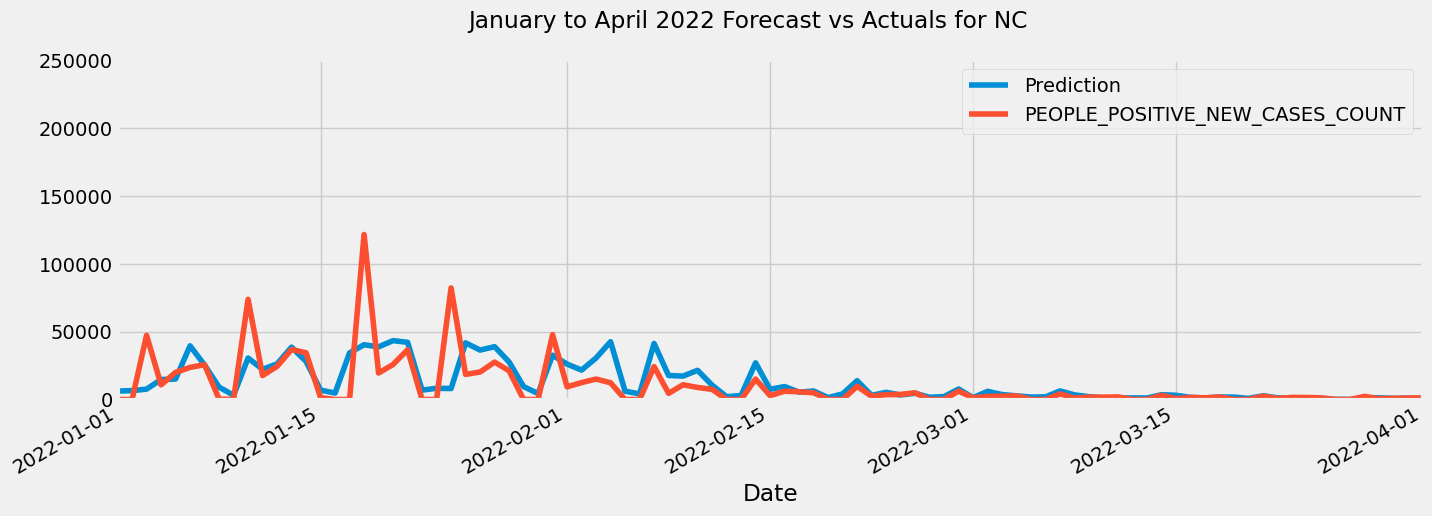

NC - Test RMSE:  12017.498764907996
NC - Test MAE:  5184.101815181442
NC - Test MASE: 0.6388375748179502


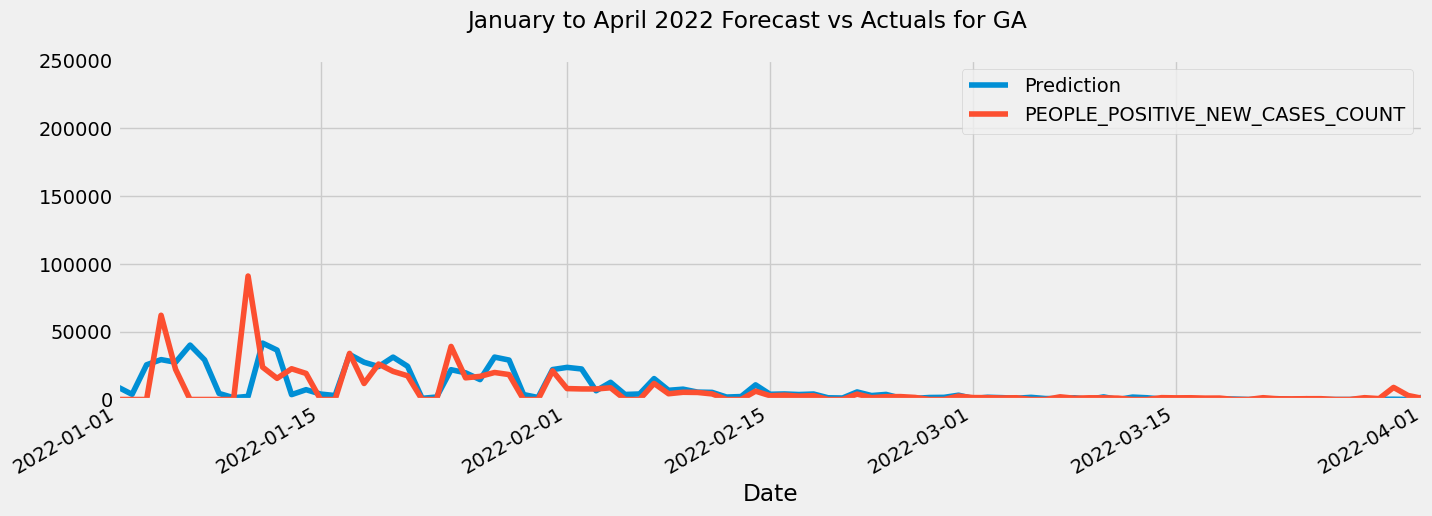

GA - Test RMSE:  10001.389760695189
GA - Test MAE:  3952.2533944558495
GA - Test MASE: 0.7987947772007832


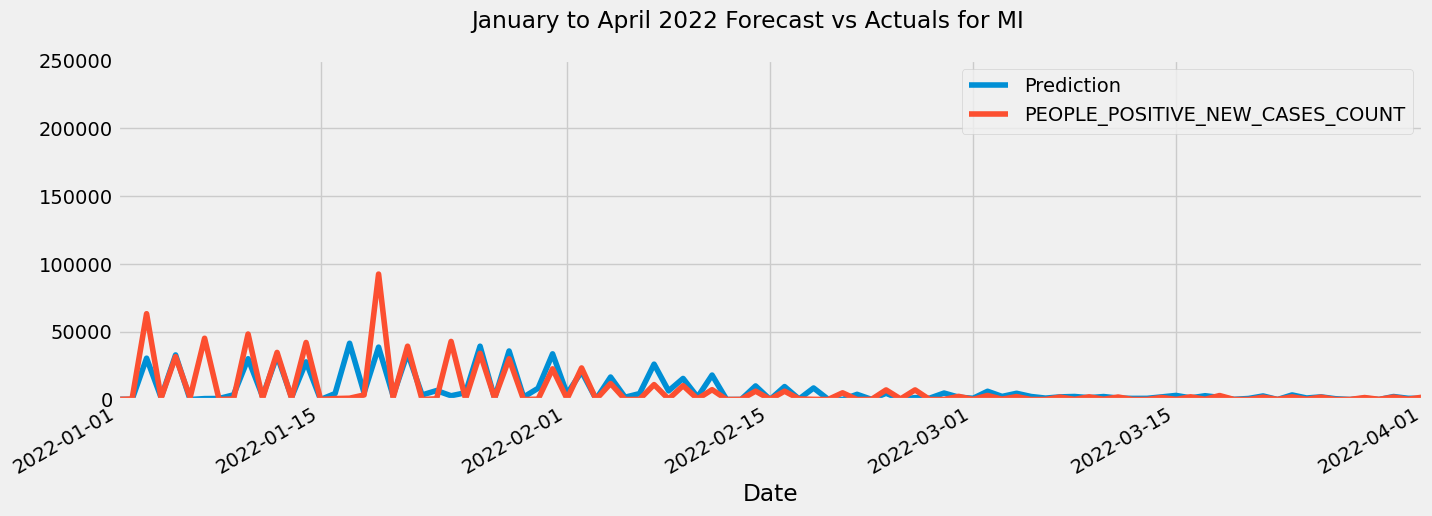

MI - Test RMSE:  8671.913210159728
MI - Test MAE:  3684.8826190610475
MI - Test MASE: 0.3063566055831043


In [39]:
# Function to plot forecast vs actuals and print metrics
def plot_forecast_and_metrics(state, df_state):
    f, ax = plt.subplots(1)
    f.set_figheight(5)
    f.set_figwidth(15)
    _ = df_state[['Prediction', 'PEOPLE_POSITIVE_NEW_CASES_COUNT']].plot(ax=ax, style=['-', '-'])
    ax.set_xbound(lower='01-01-2022', upper='04-01-2022')
    ax.set_ylim(0, 250000)
    plt.suptitle(f'January to April 2022 Forecast vs Actuals for {state}')
    plt.show()

    df_test_state = df_state[df_state['Prediction'].notna()]

    model_rmse = mean_squared_error(df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test_state['Prediction'], squared=False)
    model_mae = mean_absolute_error(df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test_state['Prediction'])
    print(f'{state} - Test RMSE: ', model_rmse)
    print(f'{state} - Test MAE: ', model_mae)

    actuals = df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT']
    naive_forecasts = actuals.shift(1)  # Shift the actuals by one to get the naive forecast
    mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])
    mase = model_mae / mae_naive
    print(f'{state} - Test MASE: {mase}')

# Dictionaries of states and their corresponding DataFrames
states_data = {
    'CA': df_CA,
    'TX': df_TX,
    'IL': df_IL,
    'NY': df_NY,
    'FL': df_FL,
    'PA': df_PA,
    'OH': df_OH,
    'NC': df_NC,
    'GA': df_GA,
    'MI': df_MI
}

# Iterate over each state and its dataset
for state, df_state in states_data.items():
    plot_forecast_and_metrics(state, df_state)

In [40]:
def evaluate_metrics(state, df_state):
    df_test_state = df_state[df_state['Prediction'].notna()]

    model_rmse = mean_squared_error(df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test_state['Prediction'], squared=False)
    model_mae = mean_absolute_error(df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test_state['Prediction'])

    actuals = df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT']
    naive_forecasts = actuals.shift(1)  # Shift the actuals by one to get the naive forecast
    mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])
    mase = model_mae / mae_naive

    return model_rmse, model_mae, mase

# Dictionary of states and their corresponding DataFrames
states_data = {
    'CA': df_CA,
    'TX': df_TX,
    'IL': df_IL,
    'NY': df_NY,
    'FL': df_FL,
    'PA': df_PA,
    'OH': df_OH,
    'NC': df_NC,
    'GA': df_GA,
    'MI': df_MI
}

# Lists to store the metrics for each state
rmses = []
maes = []
mases = []

# Iterate over each state and its dataset, collecting metrics
for state, df_state in states_data.items():
    rmse, mae, mase = evaluate_metrics(state, df_state)
    rmses.append(rmse)
    maes.append(mae)
    mases.append(mase)

# Calculate the average of each metric across the states
avg_rmse = sum(rmses) / len(rmses)
avg_mae = sum(maes) / len(maes)
avg_mase = sum(mases) / len(mases)

print(f'Average RMSE across all states: {avg_rmse}')
print(f'Average MAE across all states: {avg_mae}')
print(f'Average MASE across all states: {avg_mase}')

Average RMSE across all states: 14811.033113173524
Average MAE across all states: 6326.298842356176
Average MASE across all states: 0.9322782376620211


## Feature selection

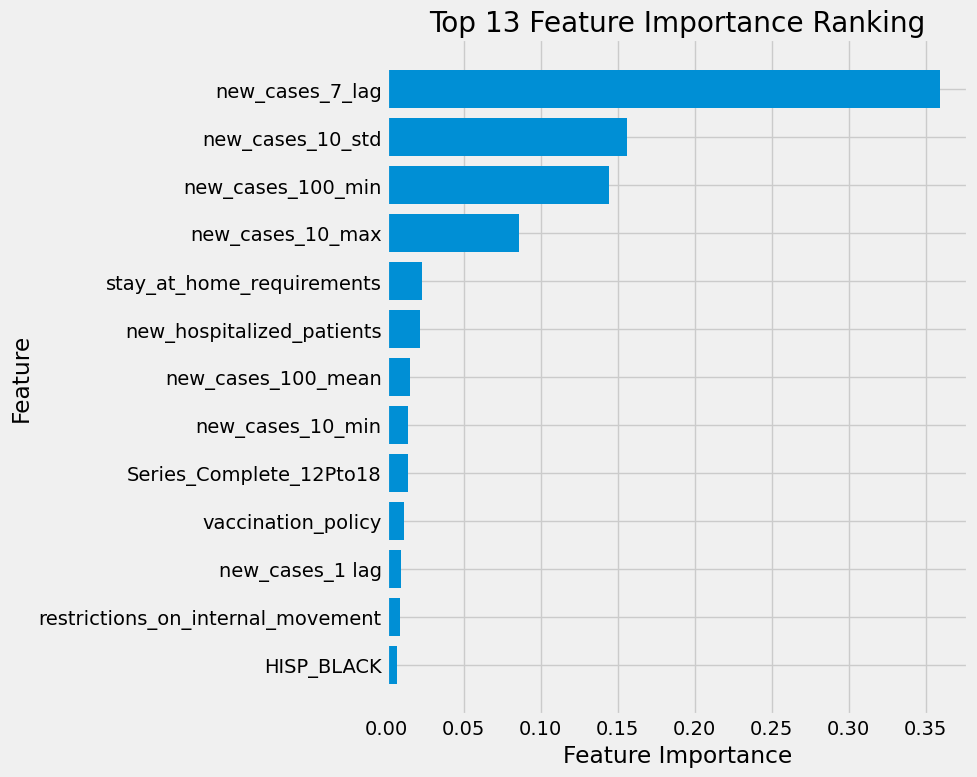

In [41]:
model = xgb.XGBRegressor(objective='reg:squarederror')

rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

feature_importances = np.zeros(X_train.shape[1])

kf = KFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model.fit(X_train_fold, y_train_fold)
    
    feature_importances += model.feature_importances_ / kf.n_splits

# Now, for the chart of all of the most important features ranked:
# Pair feature names with their importances
feature_importance_pairs = [(feature, importance) for feature, importance in zip(X_train.columns, feature_importances)]

# Sort the features by importance
sorted_features = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Unzip the sorted pairs for plotting
sorted_feature_names, sorted_importances = zip(*sorted_features)

top_n = 13
sorted_feature_names_top = sorted_feature_names[:top_n]
sorted_importances_top = sorted_importances[:top_n]

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importances_top)), sorted_importances_top, align='center')
plt.yticks(range(len(sorted_importances_top)), sorted_feature_names_top)
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature on top
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 13 Feature Importance Ranking')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [42]:
model = xgb.XGBRegressor(objective='reg:squarederror')

rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

feature_importances = np.zeros(X_train.shape[1])

kf = KFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model.fit(X_train_fold, y_train_fold)
    
    feature_importances += model.feature_importances_ / kf.n_splits

threshold = np.quantile(feature_importances, 0.75)  # Example threshold: top 25% features
selected_features = X_train.columns[feature_importances > threshold]

# Training and evaluating the model on selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [43]:
selected_features

Index(['new_cases_10_min', 'restrictions_on_internal_movement',
       'stay_at_home_requirements', 'new_cases_100_min', 'new_cases_1 lag',
       'new_cases_7_lag', 'HISP_BLACK', 'new_hospitalized_patients',
       'new_cases_10_std', 'new_cases_10_max', 'new_cases_100_mean',
       'vaccination_policy', 'Series_Complete_12Pto18'],
      dtype='object')

In [44]:
reg = xgb.XGBRegressor()
reg.fit(X_train_selected, y_train,
        eval_set=[(X_train_selected, y_train), (X_test_selected, y_test)], 
       verbose=True)

[0]	validation_0-rmse:5249.47545	validation_1-rmse:26534.74219
[1]	validation_0-rmse:4043.05384	validation_1-rmse:23321.58296
[2]	validation_0-rmse:3199.95950	validation_1-rmse:21384.25067
[3]	validation_0-rmse:2618.68540	validation_1-rmse:20130.24740
[4]	validation_0-rmse:2219.45118	validation_1-rmse:19478.19290
[5]	validation_0-rmse:1941.23439	validation_1-rmse:19040.91615
[6]	validation_0-rmse:1740.56952	validation_1-rmse:18765.63566
[7]	validation_0-rmse:1602.52298	validation_1-rmse:18596.47957
[8]	validation_0-rmse:1517.25306	validation_1-rmse:18503.91909
[9]	validation_0-rmse:1454.35915	validation_1-rmse:18453.60135
[10]	validation_0-rmse:1391.75724	validation_1-rmse:18384.42799
[11]	validation_0-rmse:1350.34555	validation_1-rmse:18321.17409
[12]	validation_0-rmse:1304.63744	validation_1-rmse:18274.22215
[13]	validation_0-rmse:1275.94862	validation_1-rmse:18243.09747
[14]	validation_0-rmse:1258.43107	validation_1-rmse:18221.64382
[15]	validation_0-rmse:1244.18064	validation_1-rms

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [45]:
df_test['Prediction'] = reg.predict(X_test_selected)
df_test['Prediction'] = df_test['Prediction'].apply(lambda x: max(x, 0))

df = pd.concat([df_test, df_train], sort=False)

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_19234/1957657166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Prediction'] = reg.predict(X_test_selected)
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_19234/1957657166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Prediction'] = df_test['Prediction'].apply(lambda x: max(x, 0))


In [46]:
state_mapping = {
    'California': 0,
    'Texas': 1,
    'Illinois': 2,
    'New York': 3,
    'Florida': 4,
    'Pennsylvania': 5,
    'Ohio': 6,
    'North Carolina': 7,
    'Georgia': 8,
    'Michigan': 9
}

df_CA = df[df['STATE'] == 0]
df_TX = df[df['STATE'] == 1]
df_IL = df[df['STATE'] == 2]
df_NY = df[df['STATE'] == 3]
df_FL = df[df['STATE'] == 4]
df_PA = df[df['STATE'] == 5]
df_OH = df[df['STATE'] == 6]
df_NC = df[df['STATE'] == 7]
df_GA = df[df['STATE'] == 8]
df_MI = df[df['STATE'] == 9]

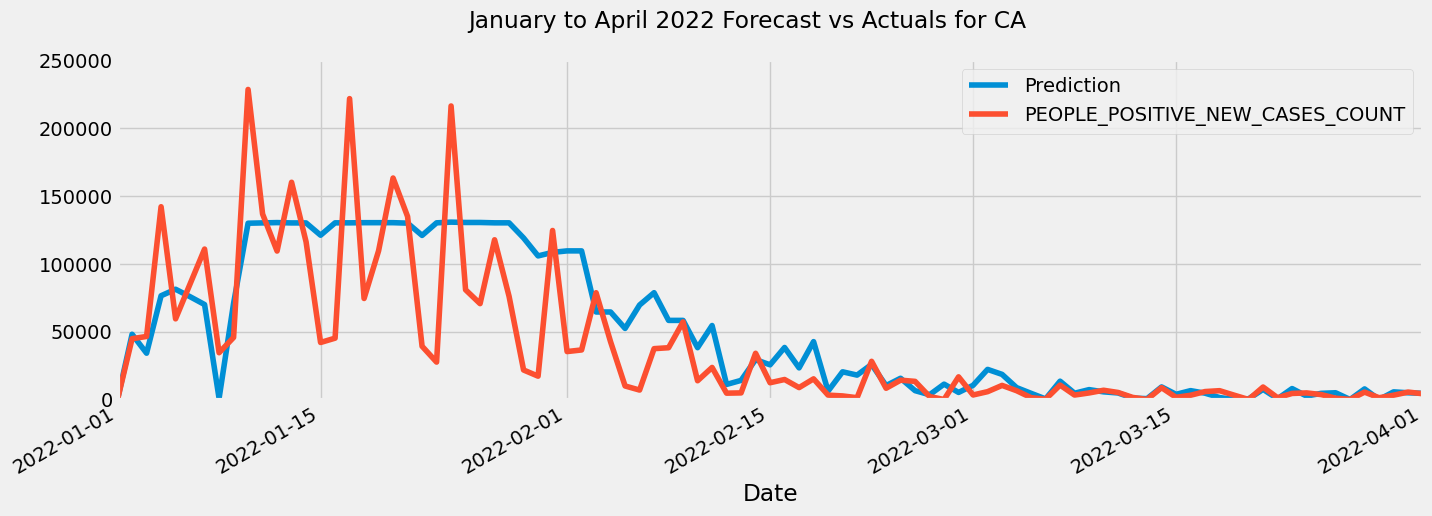

CA - Test RMSE:  28228.98174235577
CA - Test MAE:  15187.224790518796
CA - Test MASE: 0.7712784744769585


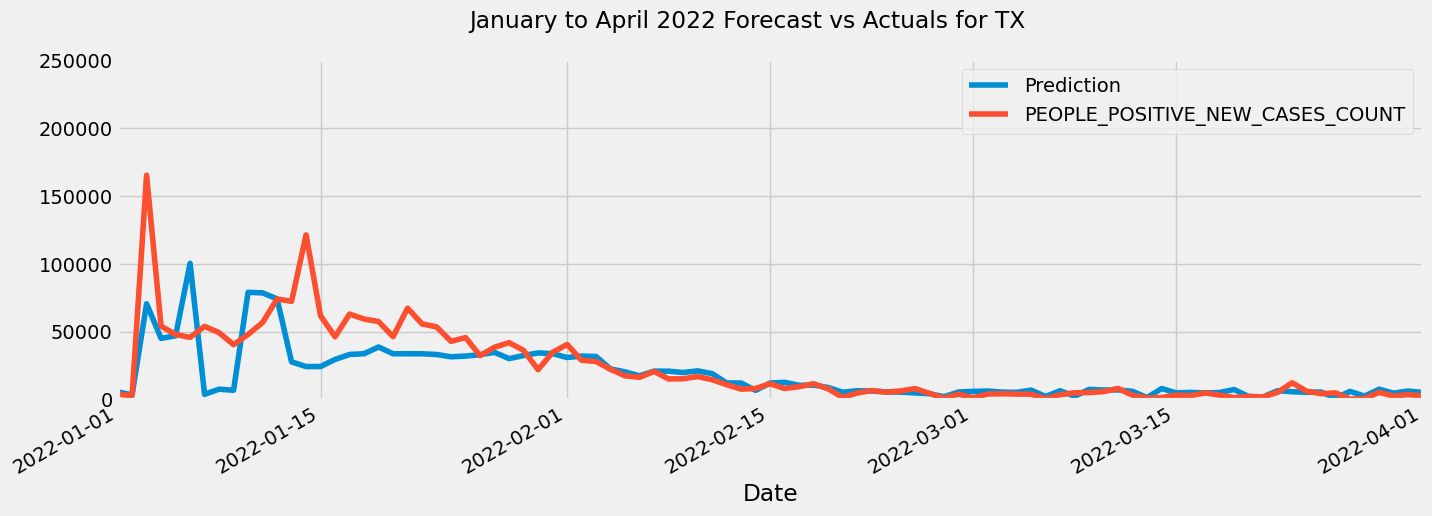

TX - Test RMSE:  15534.351602124361
TX - Test MAE:  6937.734521407116
TX - Test MASE: 1.103417580194965


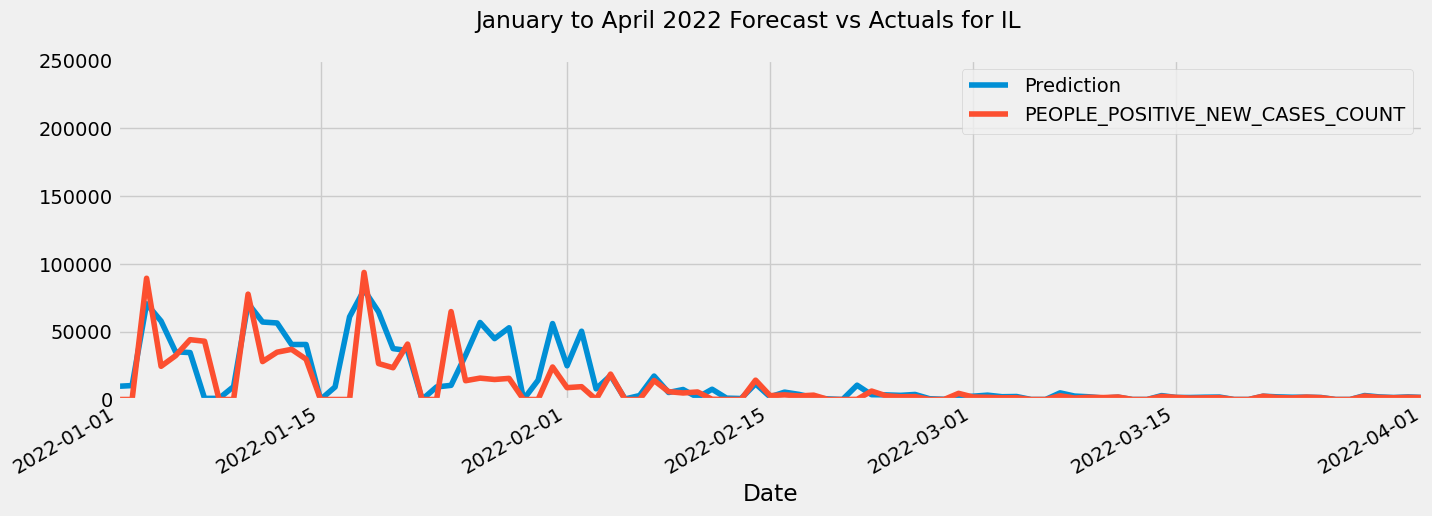

IL - Test RMSE:  12086.725180912397
IL - Test MAE:  5713.627706563925
IL - Test MASE: 0.6643969659287787


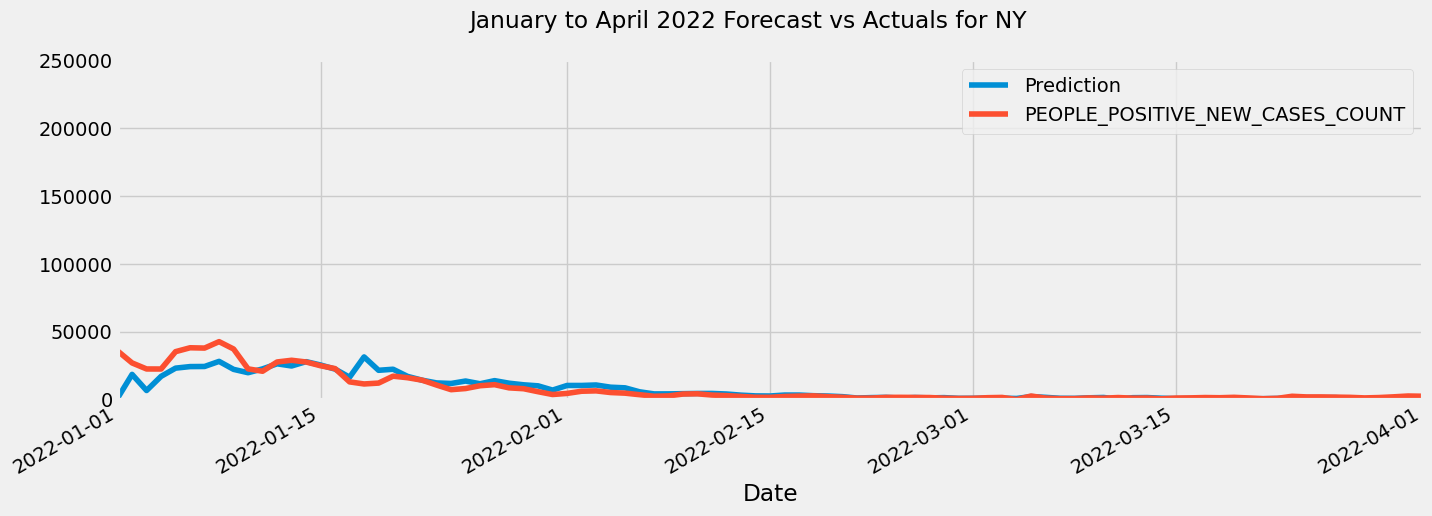

NY - Test RMSE:  5133.178584881851
NY - Test MAE:  2563.1859704512585
NY - Test MASE: 1.354767699167949


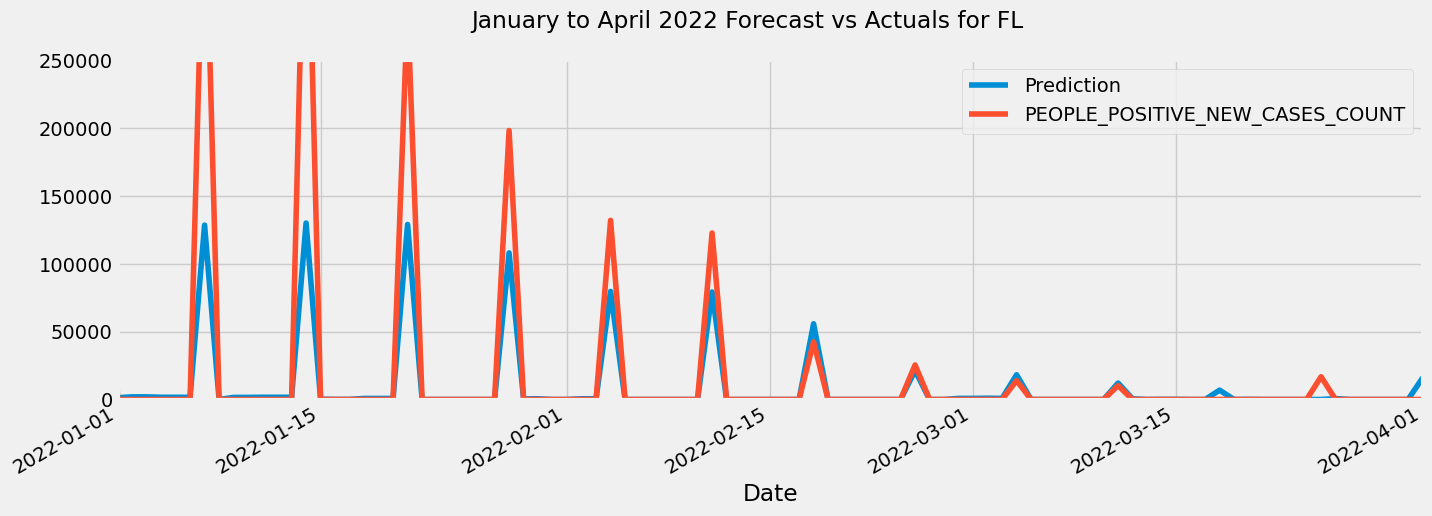

FL - Test RMSE:  40929.62168526446
FL - Test MAE:  9393.248942432525
FL - Test MASE: 0.3319665345684004


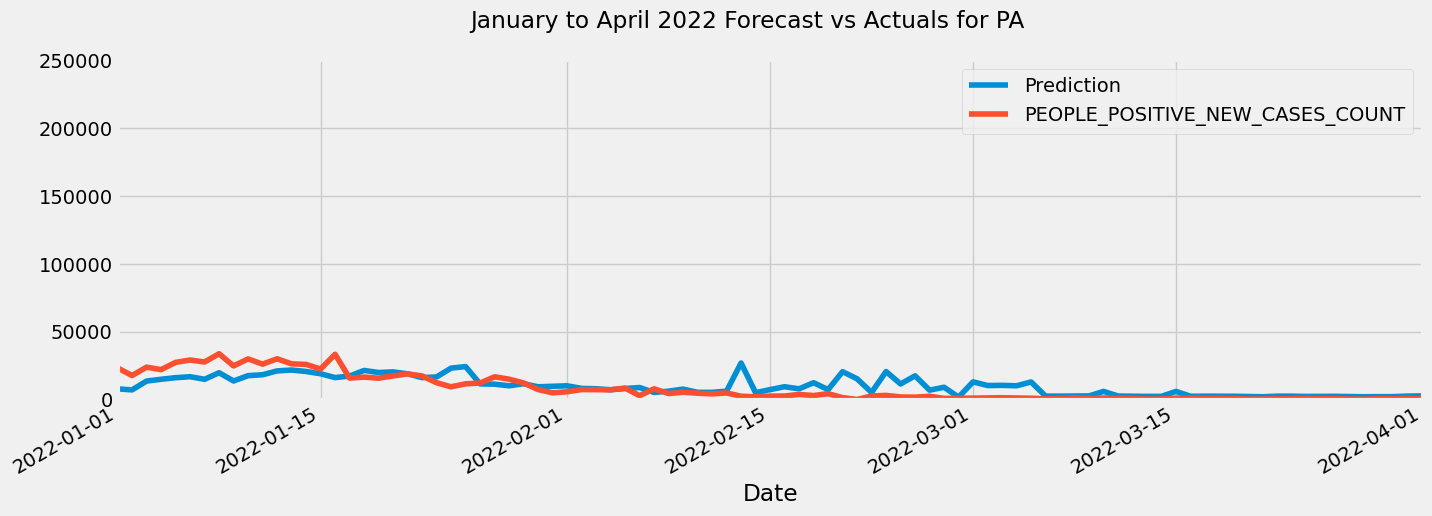

PA - Test RMSE:  6371.416097152493
PA - Test MAE:  4451.39490441431
PA - Test MASE: 2.7824098035347875


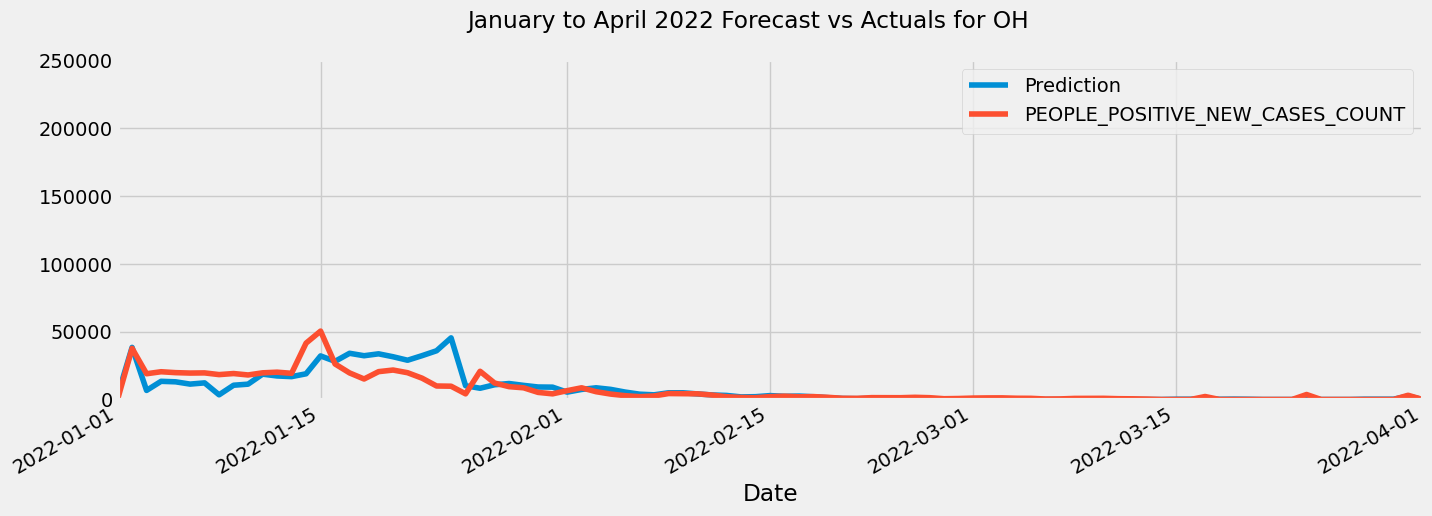

OH - Test RMSE:  5958.534936766651
OH - Test MAE:  2939.3383077307594
OH - Test MASE: 1.0916491362484813


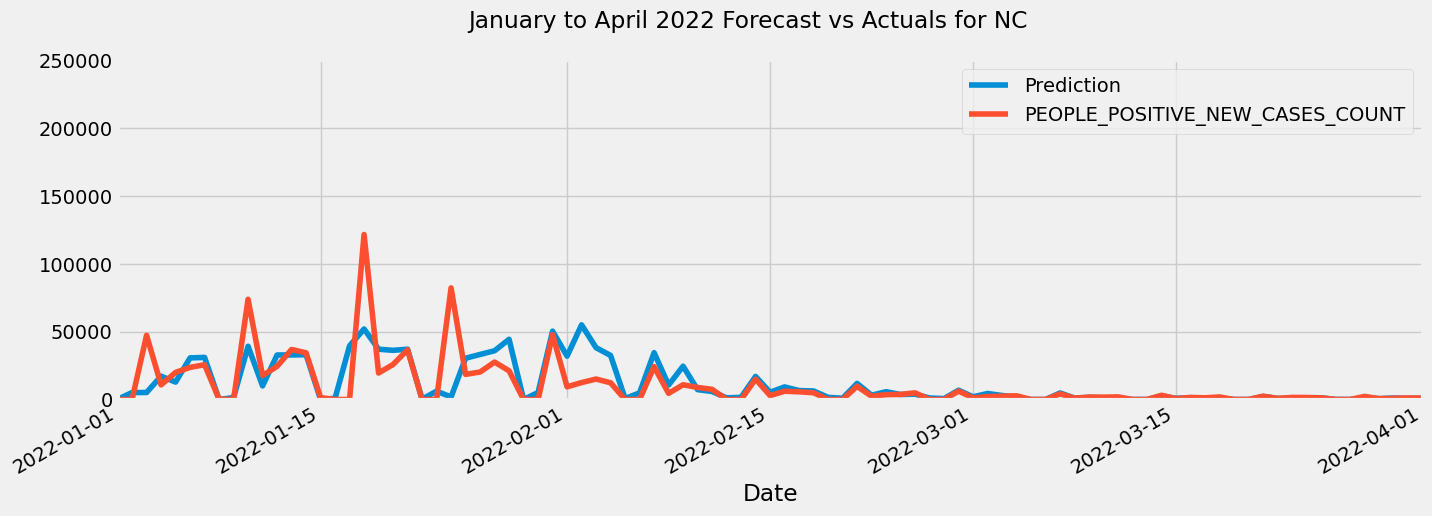

NC - Test RMSE:  11860.473104790113
NC - Test MAE:  4563.308694911909
NC - Test MASE: 0.5623371538086116


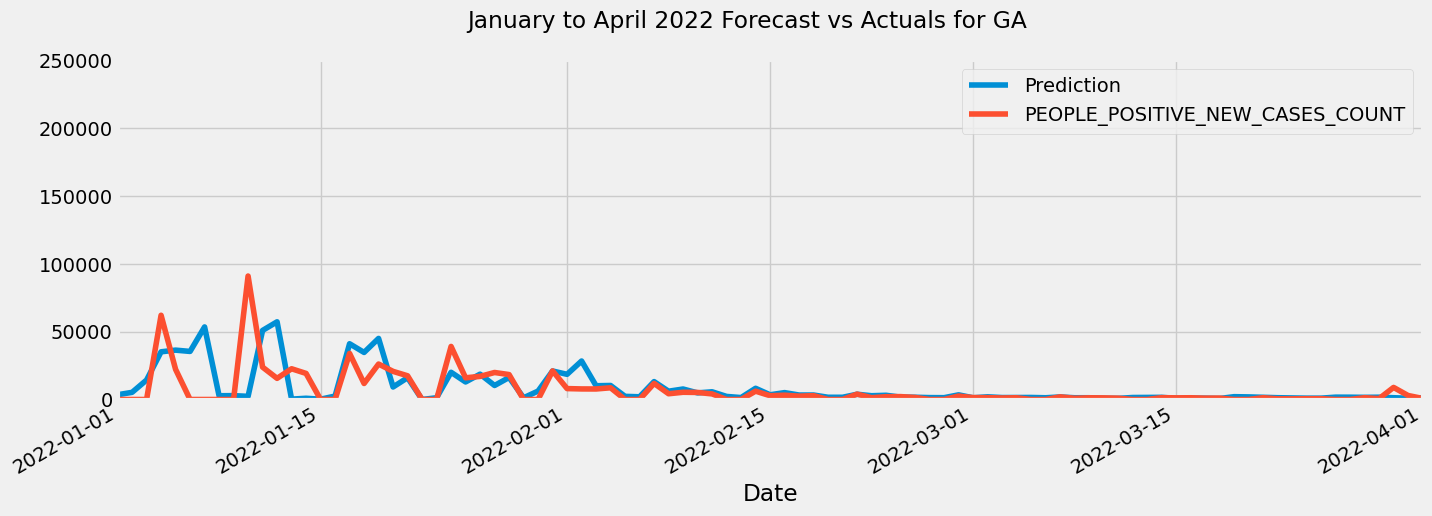

GA - Test RMSE:  11059.09116272966
GA - Test MAE:  4234.555285490012
GA - Test MASE: 0.855851158370149


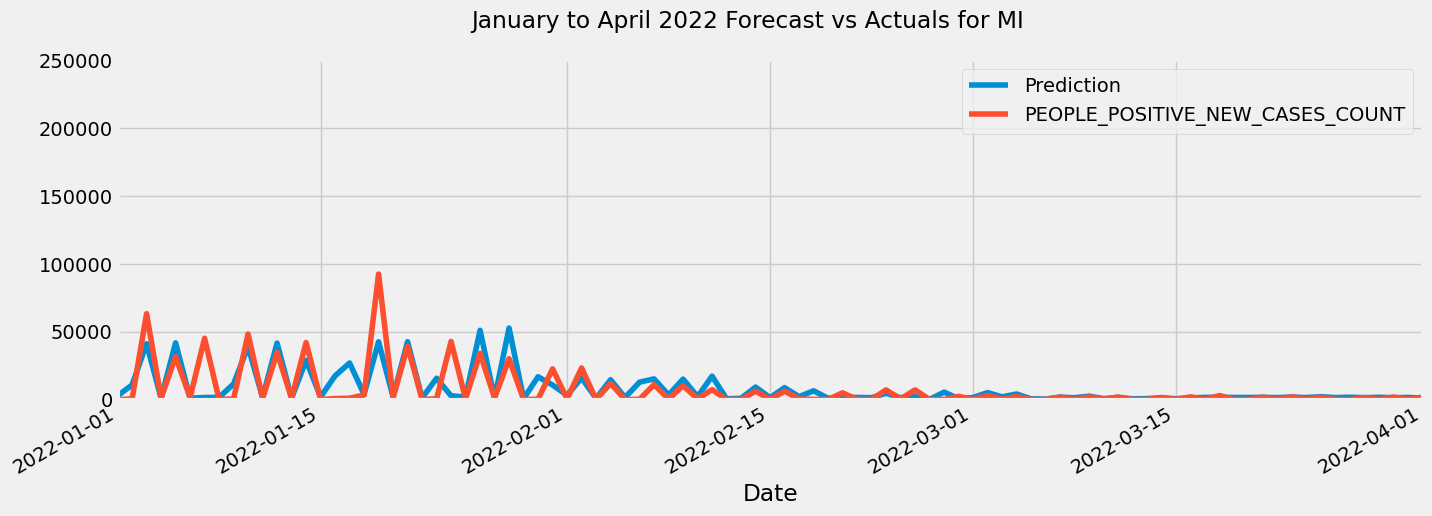

MI - Test RMSE:  8460.866355295173
MI - Test MAE:  3953.2609029359455
MI - Test MASE: 0.32866924578359


In [47]:
# Function to plot forecast vs actuals and print metrics
def plot_forecast_and_metrics(state, df_state):
    f, ax = plt.subplots(1)
    f.set_figheight(5)
    f.set_figwidth(15)
    _ = df_state[['Prediction', 'PEOPLE_POSITIVE_NEW_CASES_COUNT']].plot(ax=ax, style=['-', '-'])
    ax.set_xbound(lower='01-01-2022', upper='04-01-2022')
    ax.set_ylim(0, 250000)
    plt.suptitle(f'January to April 2022 Forecast vs Actuals for {state}')
    plt.show()

    df_test_state = df_state[df_state['Prediction'].notna()]

    model_rmse = mean_squared_error(df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test_state['Prediction'], squared=False)
    model_mae = mean_absolute_error(df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test_state['Prediction'])
    print(f'{state} - Test RMSE: ', model_rmse)
    print(f'{state} - Test MAE: ', model_mae)

    actuals = df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT']
    naive_forecasts = actuals.shift(1)  # Shift the actuals by one to get the naive forecast
    mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])
    mase = model_mae / mae_naive
    print(f'{state} - Test MASE: {mase}')

# Dictionaries of states and their corresponding DataFrames
states_data = {
    'CA': df_CA,
    'TX': df_TX,
    'IL': df_IL,
    'NY': df_NY,
    'FL': df_FL,
    'PA': df_PA,
    'OH': df_OH,
    'NC': df_NC,
    'GA': df_GA,
    'MI': df_MI
}

# Iterate over each state and its dataset
for state, df_state in states_data.items():
    plot_forecast_and_metrics(state, df_state)

In [48]:
def evaluate_metrics(state, df_state):
    df_test_state = df_state[df_state['Prediction'].notna()]

    model_rmse = mean_squared_error(df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test_state['Prediction'], squared=False)
    model_mae = mean_absolute_error(df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test_state['Prediction'])

    actuals = df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT']
    naive_forecasts = actuals.shift(1)  # Shift the actuals by one to get the naive forecast
    mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])
    mase = model_mae / mae_naive

    return model_rmse, model_mae, mase

# Dictionary of states and their corresponding DataFrames
states_data = {
    'CA': df_CA,
    'TX': df_TX,
    'IL': df_IL,
    'NY': df_NY,
    'FL': df_FL,
    'PA': df_PA,
    'OH': df_OH,
    'NC': df_NC,
    'GA': df_GA,
    'MI': df_MI
}

# Lists to store the metrics for each state
rmses = []
maes = []
mases = []

# Iterate over each state and its dataset, collecting metrics
for state, df_state in states_data.items():
    rmse, mae, mase = evaluate_metrics(state, df_state)
    rmses.append(rmse)
    maes.append(mae)
    mases.append(mase)

# Calculate the average of each metric across the states
avg_rmse = sum(rmses) / len(rmses)
avg_mae = sum(maes) / len(maes)
avg_mase = sum(mases) / len(mases)

print(f'Average RMSE across all states: {avg_rmse}')
print(f'Average MAE across all states: {avg_mae}')
print(f'Average MASE across all states: {avg_mase}')

Average RMSE across all states: 14562.324045227293
Average MAE across all states: 5993.688002685654
Average MASE across all states: 0.984674375208267


## Parameter tuning

In [49]:
param_grid = {
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 5, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 500],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0],
}

best_rmse = float("inf")
best_params = None

tscv = TimeSeriesSplit(n_splits=3)

for max_depth in param_grid['max_depth']:
    for min_child_weight in param_grid['min_child_weight']:
        for learning_rate in param_grid['learning_rate']:
            for n_estimators in param_grid['n_estimators']:
                for subsample in param_grid['subsample']:
                    for colsample_bytree in param_grid['colsample_bytree']:
                        rmse_list = []
                        for train_index, test_index in tscv.split(X_train_selected):
                            X_train_fold, X_test_fold = X_train_selected.iloc[train_index], X_train_selected.iloc[test_index]
                            y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
                            
                            model = xgb.XGBRegressor(
                                objective='reg:squarederror',
                                max_depth=max_depth,
                                min_child_weight=min_child_weight,
                                learning_rate=learning_rate,
                                n_estimators=n_estimators,
                                subsample=subsample,
                                colsample_bytree=colsample_bytree
                            )
                            
                            model.fit(X_train_fold, y_train_fold)
                            predictions = model.predict(X_test_fold)
                            fold_rmse = np.sqrt(mean_squared_error(y_test_fold, predictions))
                            rmse_list.append(fold_rmse)
                        
                        # Average RMSE over all folds
                        avg_rmse = np.mean(rmse_list)
                        
                        if avg_rmse < best_rmse:
                            best_rmse = avg_rmse
                            best_params = (max_depth, min_child_weight, learning_rate, n_estimators, subsample, colsample_bytree)

print(f"Best parameters found: {best_params}")
print(f"Lowest RMSE found: {best_rmse}")

Best parameters found: (10, 1, 0.1, 500, 0.7, 1.0)
Lowest RMSE found: 5410.776128237853


In [50]:
reg = xgb.XGBRegressor(max_depth=6,
                        min_child_weight=10,
                        learning_rate=.01,
                        n_estimators=500,
                        subsample=0.5,
                        colsample_bytree=0.7)
reg.fit(X_train_selected, y_train,
        eval_set=[(X_train_selected, y_train), (X_test_selected, y_test)], 
       verbose=True)

[0]	validation_0-rmse:6915.12024	validation_1-rmse:28169.55089
[1]	validation_0-rmse:6880.44817	validation_1-rmse:28115.63715
[2]	validation_0-rmse:6836.09286	validation_1-rmse:28035.44138
[3]	validation_0-rmse:6801.32519	validation_1-rmse:28017.99351
[4]	validation_0-rmse:6770.87796	validation_1-rmse:28010.53547
[5]	validation_0-rmse:6725.39415	validation_1-rmse:27927.02208
[6]	validation_0-rmse:6696.48057	validation_1-rmse:27881.13376
[7]	validation_0-rmse:6655.03159	validation_1-rmse:27816.49954
[8]	validation_0-rmse:6609.10465	validation_1-rmse:27710.32841
[9]	validation_0-rmse:6565.74748	validation_1-rmse:27604.69510
[10]	validation_0-rmse:6535.50434	validation_1-rmse:27559.04572
[11]	validation_0-rmse:6494.27396	validation_1-rmse:27470.05712
[12]	validation_0-rmse:6463.92009	validation_1-rmse:27453.07500
[13]	validation_0-rmse:6420.25029	validation_1-rmse:27351.41045
[14]	validation_0-rmse:6390.89745	validation_1-rmse:27308.42820
[15]	validation_0-rmse:6364.16267	validation_1-rms

[128]	validation_0-rmse:3937.77633	validation_1-rmse:22331.82224
[129]	validation_0-rmse:3922.46981	validation_1-rmse:22305.29457
[130]	validation_0-rmse:3910.19211	validation_1-rmse:22277.16625
[131]	validation_0-rmse:3896.07356	validation_1-rmse:22240.89244
[132]	validation_0-rmse:3882.02675	validation_1-rmse:22223.94026
[133]	validation_0-rmse:3868.86817	validation_1-rmse:22201.85937
[134]	validation_0-rmse:3859.63929	validation_1-rmse:22189.64218
[135]	validation_0-rmse:3847.86519	validation_1-rmse:22159.92999
[136]	validation_0-rmse:3842.11191	validation_1-rmse:22143.86834
[137]	validation_0-rmse:3830.18059	validation_1-rmse:22113.03509
[138]	validation_0-rmse:3818.72479	validation_1-rmse:22085.41221
[139]	validation_0-rmse:3813.45645	validation_1-rmse:22081.46581
[140]	validation_0-rmse:3800.17803	validation_1-rmse:22047.19395
[141]	validation_0-rmse:3796.99781	validation_1-rmse:22048.93486
[142]	validation_0-rmse:3788.81409	validation_1-rmse:22031.25825
[143]	validation_0-rmse:3

[255]	validation_0-rmse:3117.14572	validation_1-rmse:20517.90452
[256]	validation_0-rmse:3112.98389	validation_1-rmse:20504.43143
[257]	validation_0-rmse:3108.76557	validation_1-rmse:20494.58227
[258]	validation_0-rmse:3106.98394	validation_1-rmse:20488.88092
[259]	validation_0-rmse:3102.50225	validation_1-rmse:20481.80166
[260]	validation_0-rmse:3098.64518	validation_1-rmse:20468.55109
[261]	validation_0-rmse:3095.49405	validation_1-rmse:20459.18108
[262]	validation_0-rmse:3095.50482	validation_1-rmse:20457.61587
[263]	validation_0-rmse:3092.07143	validation_1-rmse:20447.69830
[264]	validation_0-rmse:3085.74924	validation_1-rmse:20444.31820
[265]	validation_0-rmse:3082.44251	validation_1-rmse:20433.57645
[266]	validation_0-rmse:3077.18743	validation_1-rmse:20430.46308
[267]	validation_0-rmse:3075.05734	validation_1-rmse:20424.79653
[268]	validation_0-rmse:3072.43633	validation_1-rmse:20412.18132
[269]	validation_0-rmse:3071.05942	validation_1-rmse:20408.00640
[270]	validation_0-rmse:3

[382]	validation_0-rmse:2820.69732	validation_1-rmse:19754.34531
[383]	validation_0-rmse:2819.90402	validation_1-rmse:19756.41597
[384]	validation_0-rmse:2817.85789	validation_1-rmse:19749.56924
[385]	validation_0-rmse:2816.31397	validation_1-rmse:19747.14813
[386]	validation_0-rmse:2813.48456	validation_1-rmse:19743.51914
[387]	validation_0-rmse:2812.65327	validation_1-rmse:19745.54220
[388]	validation_0-rmse:2811.69633	validation_1-rmse:19746.86336
[389]	validation_0-rmse:2807.79319	validation_1-rmse:19733.86763
[390]	validation_0-rmse:2805.45701	validation_1-rmse:19726.60485
[391]	validation_0-rmse:2803.25847	validation_1-rmse:19719.19897
[392]	validation_0-rmse:2803.72859	validation_1-rmse:19724.91297
[393]	validation_0-rmse:2798.81034	validation_1-rmse:19711.94182
[394]	validation_0-rmse:2796.80568	validation_1-rmse:19701.58581
[395]	validation_0-rmse:2792.02413	validation_1-rmse:19687.37502
[396]	validation_0-rmse:2790.33432	validation_1-rmse:19681.40930
[397]	validation_0-rmse:2

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
df_test['Prediction'] = reg.predict(X_test_selected)
df_test['Prediction'] = df_test['Prediction'].apply(lambda x: max(x, 0))

df = pd.concat([df_test, df_train], sort=False)

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_19234/1957657166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Prediction'] = reg.predict(X_test_selected)
/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_19234/1957657166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Prediction'] = df_test['Prediction'].apply(lambda x: max(x, 0))


In [24]:
state_mapping = {
    'California': 0,
    'Texas': 1,
    'Illinois': 2,
    'New York': 3,
    'Florida': 4,
    'Pennsylvania': 5,
    'Ohio': 6,
    'North Carolina': 7,
    'Georgia': 8,
    'Michigan': 9
}

df_CA = df[df['STATE'] == 0]
df_TX = df[df['STATE'] == 1]
df_IL = df[df['STATE'] == 2]
df_NY = df[df['STATE'] == 3]
df_FL = df[df['STATE'] == 4]
df_PA = df[df['STATE'] == 5]
df_OH = df[df['STATE'] == 6]
df_NC = df[df['STATE'] == 7]
df_GA = df[df['STATE'] == 8]
df_MI = df[df['STATE'] == 9]

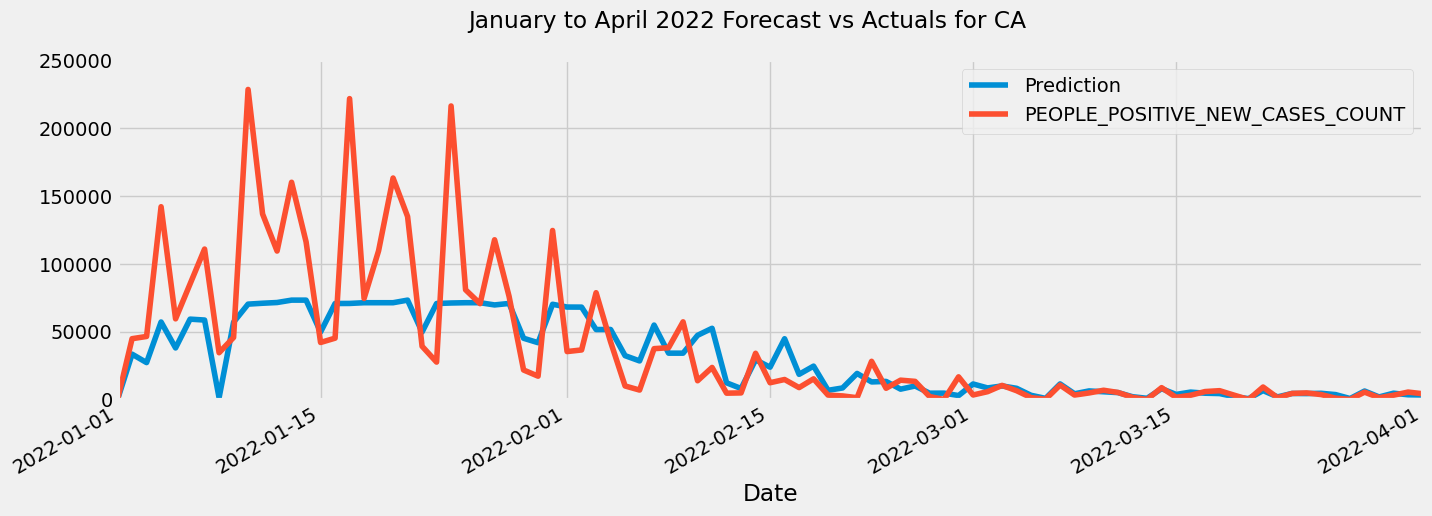

CA - Test RMSE:  28968.839441475884
CA - Test MAE:  13698.861083211777
CA - Test MASE: 0.6956923877841958


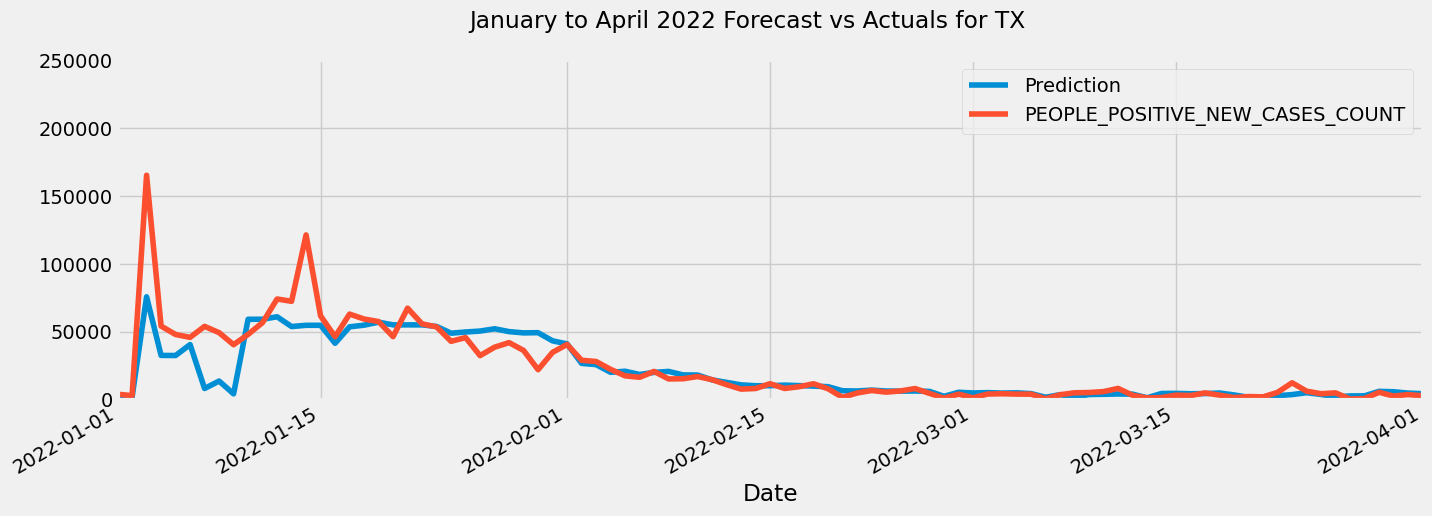

TX - Test RMSE:  11936.991803508341
TX - Test MAE:  4943.5203048126605
TX - Test MASE: 0.7862461723707932


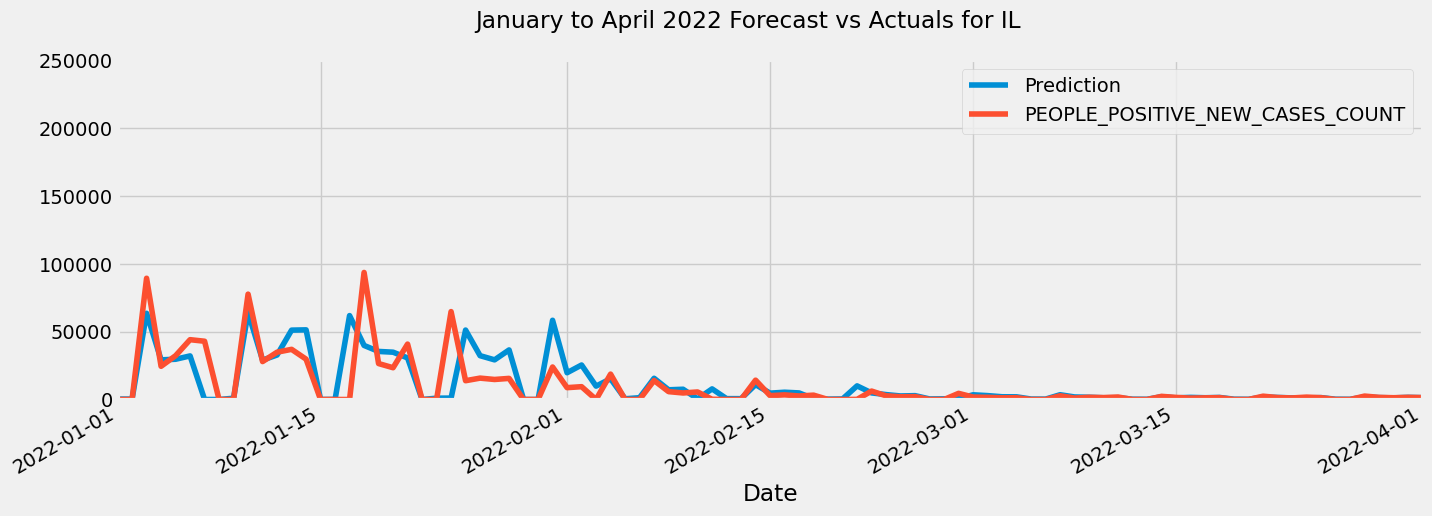

IL - Test RMSE:  11306.586379824941
IL - Test MAE:  4808.881604158426
IL - Test MASE: 0.5591905023218597


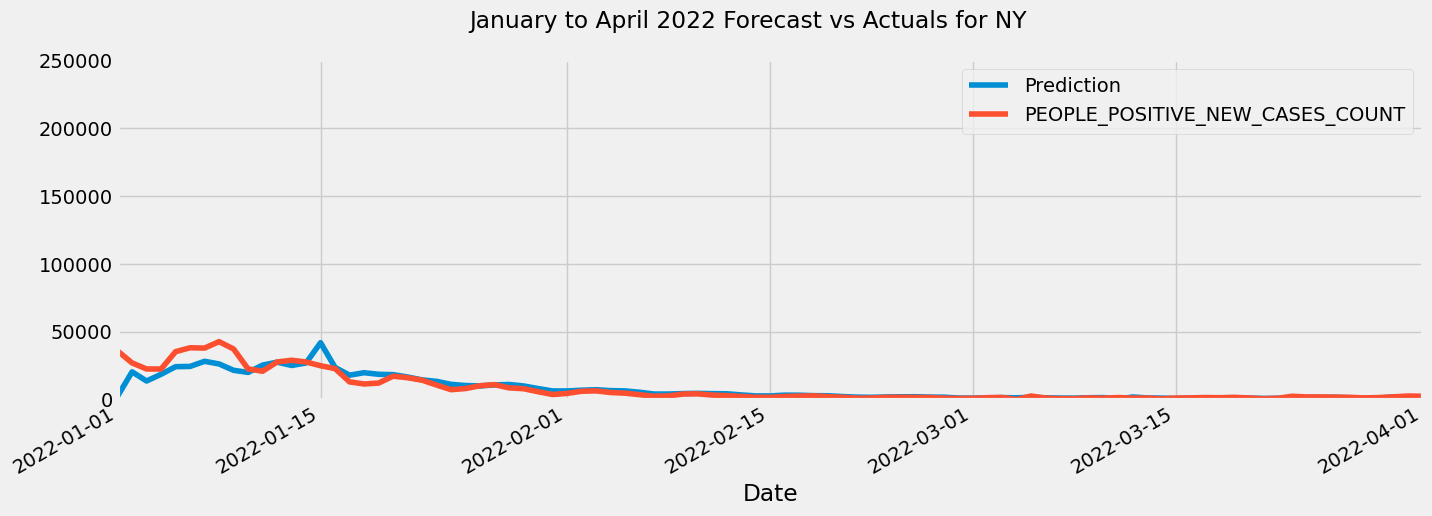

NY - Test RMSE:  4809.100483397005
NY - Test MAE:  2300.9273615969887
NY - Test MASE: 1.2161513458481255


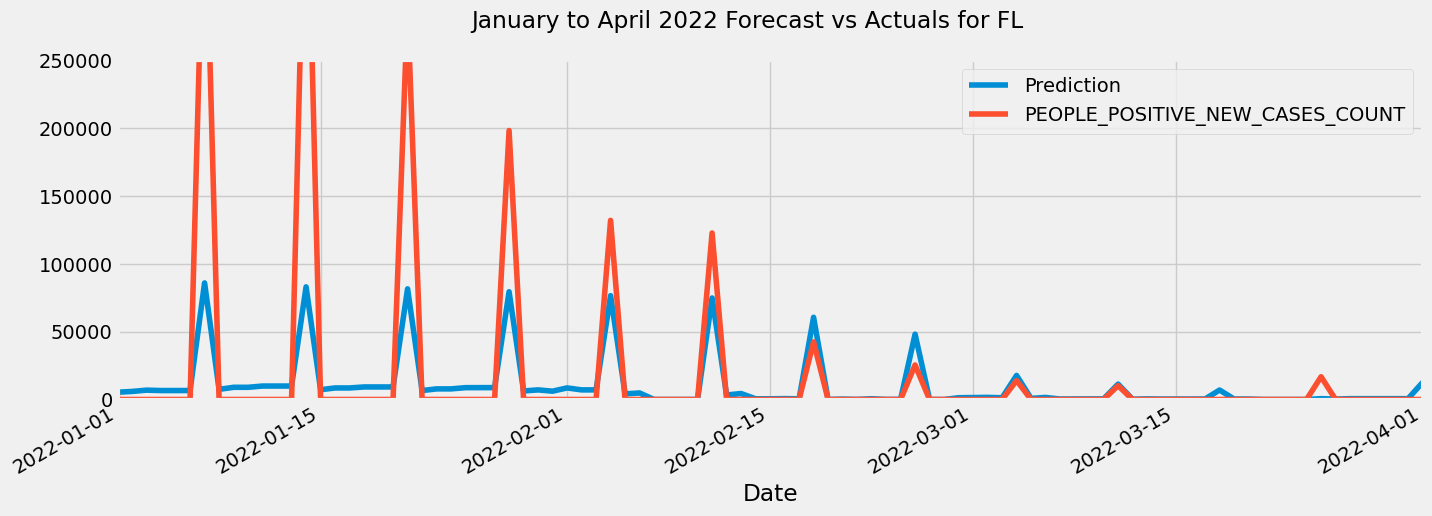

FL - Test RMSE:  46515.14179784303
FL - Test MAE:  12254.546675597565
FL - Test MASE: 0.4330875735899893


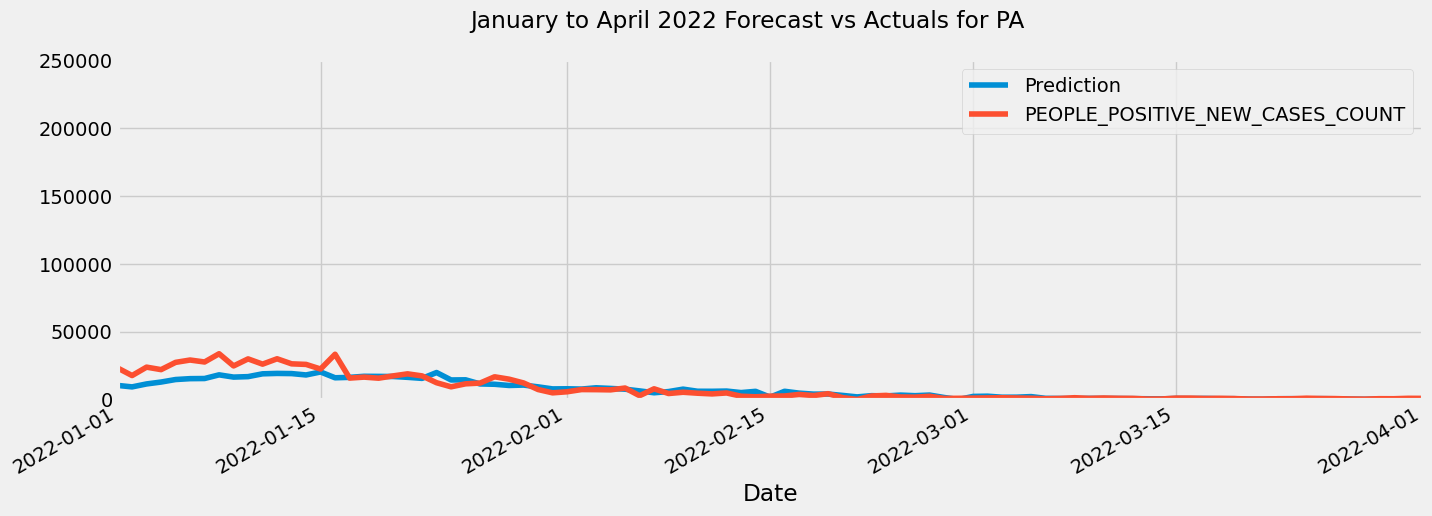

PA - Test RMSE:  4143.394319283754
PA - Test MAE:  2298.592768560482
PA - Test MASE: 1.43676919053722


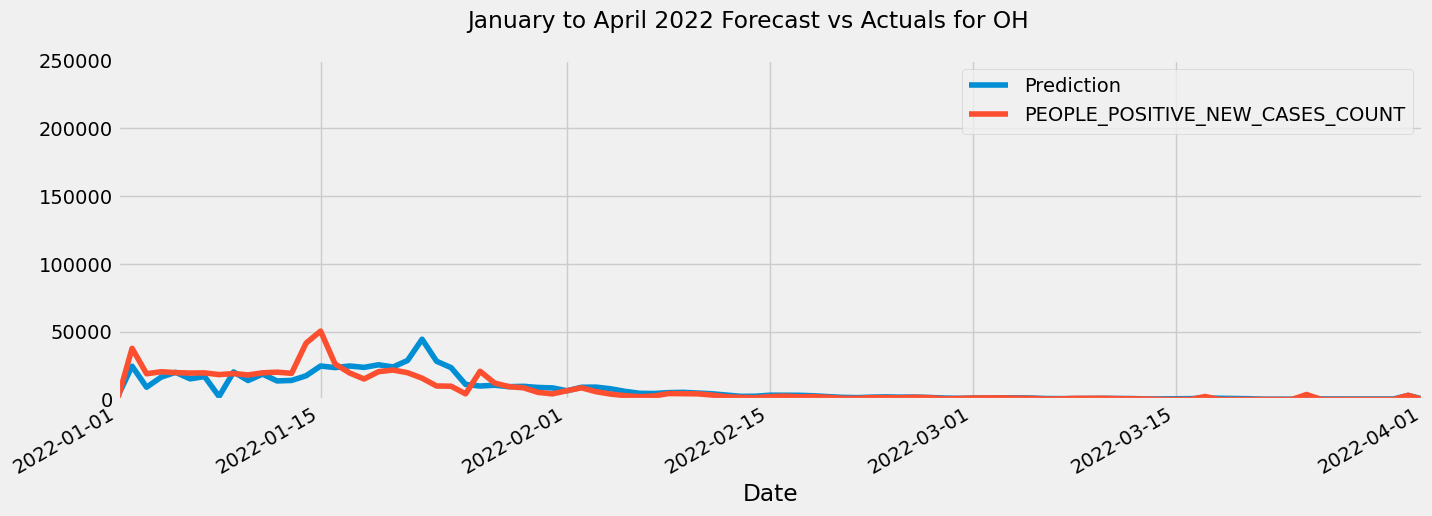

OH - Test RMSE:  5273.245302657573
OH - Test MAE:  2660.0728940360154
OH - Test MASE: 0.987931967373388


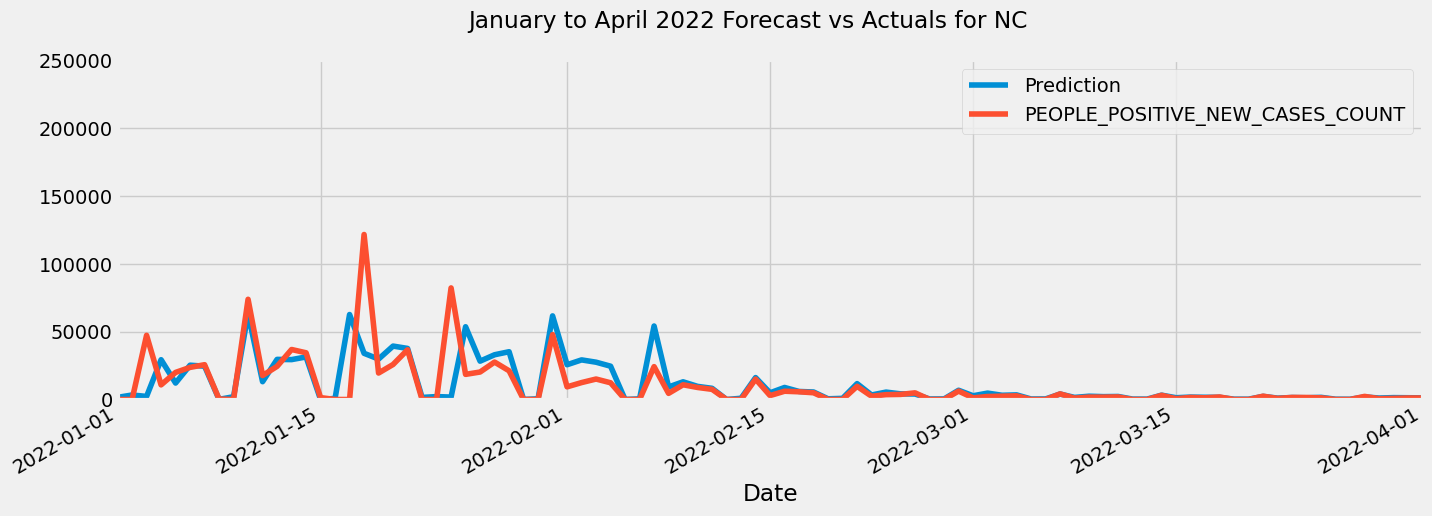

NC - Test RMSE:  12774.632246206136
NC - Test MAE:  4504.237661772137
NC - Test MASE: 0.5550578223258671


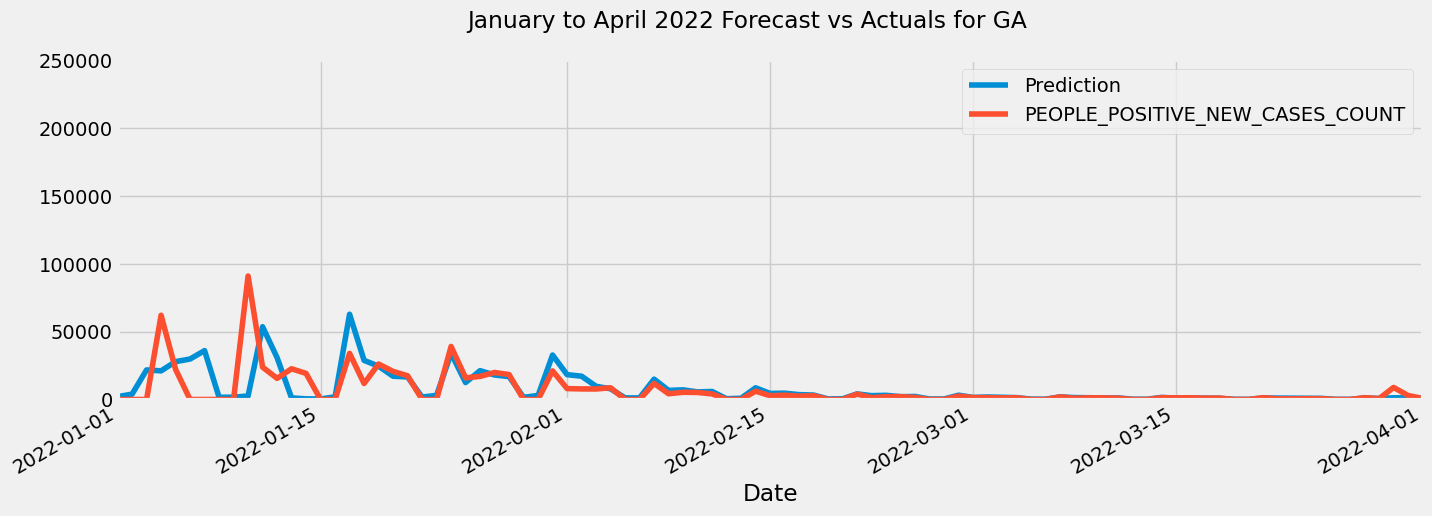

GA - Test RMSE:  10220.132036758763
GA - Test MAE:  3739.3264837868605
GA - Test MASE: 0.755759858334883


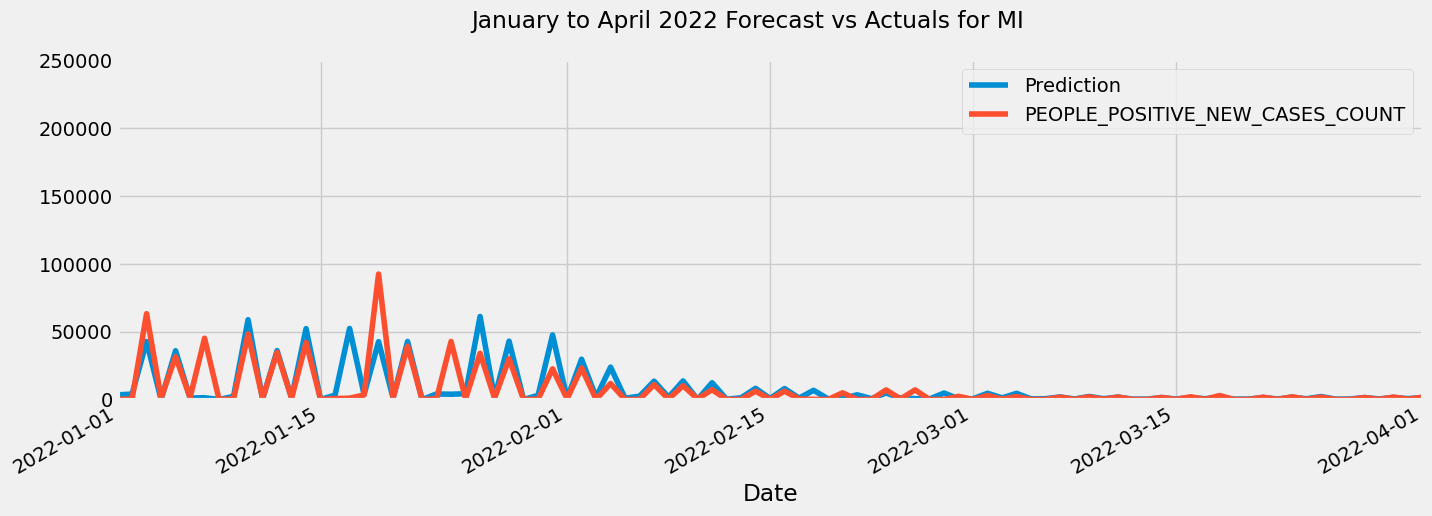

MI - Test RMSE:  8894.654005886241
MI - Test MAE:  3658.0239984536474
MI - Test MASE: 0.30412361292348356


In [25]:
# Function to plot forecast vs actuals and print metrics
def plot_forecast_and_metrics(state, df_state):
    f, ax = plt.subplots(1)
    f.set_figheight(5)
    f.set_figwidth(15)
    _ = df_state[['Prediction', 'PEOPLE_POSITIVE_NEW_CASES_COUNT']].plot(ax=ax, style=['-', '-'])
    ax.set_xbound(lower='01-01-2022', upper='04-01-2022')
    ax.set_ylim(0, 250000)
    plt.suptitle(f'January to April 2022 Forecast vs Actuals for {state}')
    plt.show()

    df_test_state = df_state[df_state['Prediction'].notna()]

    model_rmse = mean_squared_error(df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test_state['Prediction'], squared=False)
    model_mae = mean_absolute_error(df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test_state['Prediction'])
    print(f'{state} - Test RMSE: ', model_rmse)
    print(f'{state} - Test MAE: ', model_mae)

    actuals = df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT']
    naive_forecasts = actuals.shift(1)  # Shift the actuals by one to get the naive forecast
    mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])
    mase = model_mae / mae_naive
    print(f'{state} - Test MASE: {mase}')

# Dictionaries of states and their corresponding DataFrames
states_data = {
    'CA': df_CA,
    'TX': df_TX,
    'IL': df_IL,
    'NY': df_NY,
    'FL': df_FL,
    'PA': df_PA,
    'OH': df_OH,
    'NC': df_NC,
    'GA': df_GA,
    'MI': df_MI
}

# Iterate over each state and its dataset
for state, df_state in states_data.items():
    plot_forecast_and_metrics(state, df_state)

In [26]:
def evaluate_metrics(state, df_state):
    df_test_state = df_state[df_state['Prediction'].notna()]

    model_rmse = mean_squared_error(df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test_state['Prediction'], squared=False)
    model_mae = mean_absolute_error(df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT'], df_test_state['Prediction'])

    actuals = df_test_state['PEOPLE_POSITIVE_NEW_CASES_COUNT']
    naive_forecasts = actuals.shift(1)  # Shift the actuals by one to get the naive forecast
    mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])
    mase = model_mae / mae_naive

    return model_rmse, model_mae, mase

# Dictionary of states and their corresponding DataFrames
states_data = {
    'CA': df_CA,
    'TX': df_TX,
    'IL': df_IL,
    'NY': df_NY,
    'FL': df_FL,
    'PA': df_PA,
    'OH': df_OH,
    'NC': df_NC,
    'GA': df_GA,
    'MI': df_MI
}

# Lists to store the metrics for each state
rmses = []
maes = []
mases = []

# Iterate over each state and its dataset, collecting metrics
for state, df_state in states_data.items():
    rmse, mae, mase = evaluate_metrics(state, df_state)
    rmses.append(rmse)
    maes.append(mae)
    mases.append(mase)

# Calculate the average of each metric across the states
avg_rmse = sum(rmses) / len(rmses)
avg_mae = sum(maes) / len(maes)
avg_mase = sum(mases) / len(mases)

print(f'Average RMSE across all states: {avg_rmse}')
print(f'Average MAE across all states: {avg_mae}')
print(f'Average MASE across all states: {avg_mase}')

Average RMSE across all states: 14484.271781684165
Average MAE across all states: 5486.699083598656
Average MASE across all states: 0.7730010433409806


### Cross Validation Visualized

In [27]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 3, test_size = 7900-6715, gap = 24)
df_checkpoint2 = df_checkpoint.sort_index()

NameError: name 'df_checkpoint' is not defined

In [ ]:
df_train = df_checkpoint2.iloc[:6715]
df_test = df_checkpoint2.iloc[6715:]

In [73]:
X_train = df_train.drop(columns=['PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PROVINCE_STATE_NAME'])
y_train = df_train['PEOPLE_POSITIVE_NEW_CASES_COUNT']

X_test = df_test.drop(columns=['PEOPLE_POSITIVE_NEW_CASES_COUNT', 'PROVINCE_STATE_NAME'])
y_test = df_test['PEOPLE_POSITIVE_NEW_CASES_COUNT']

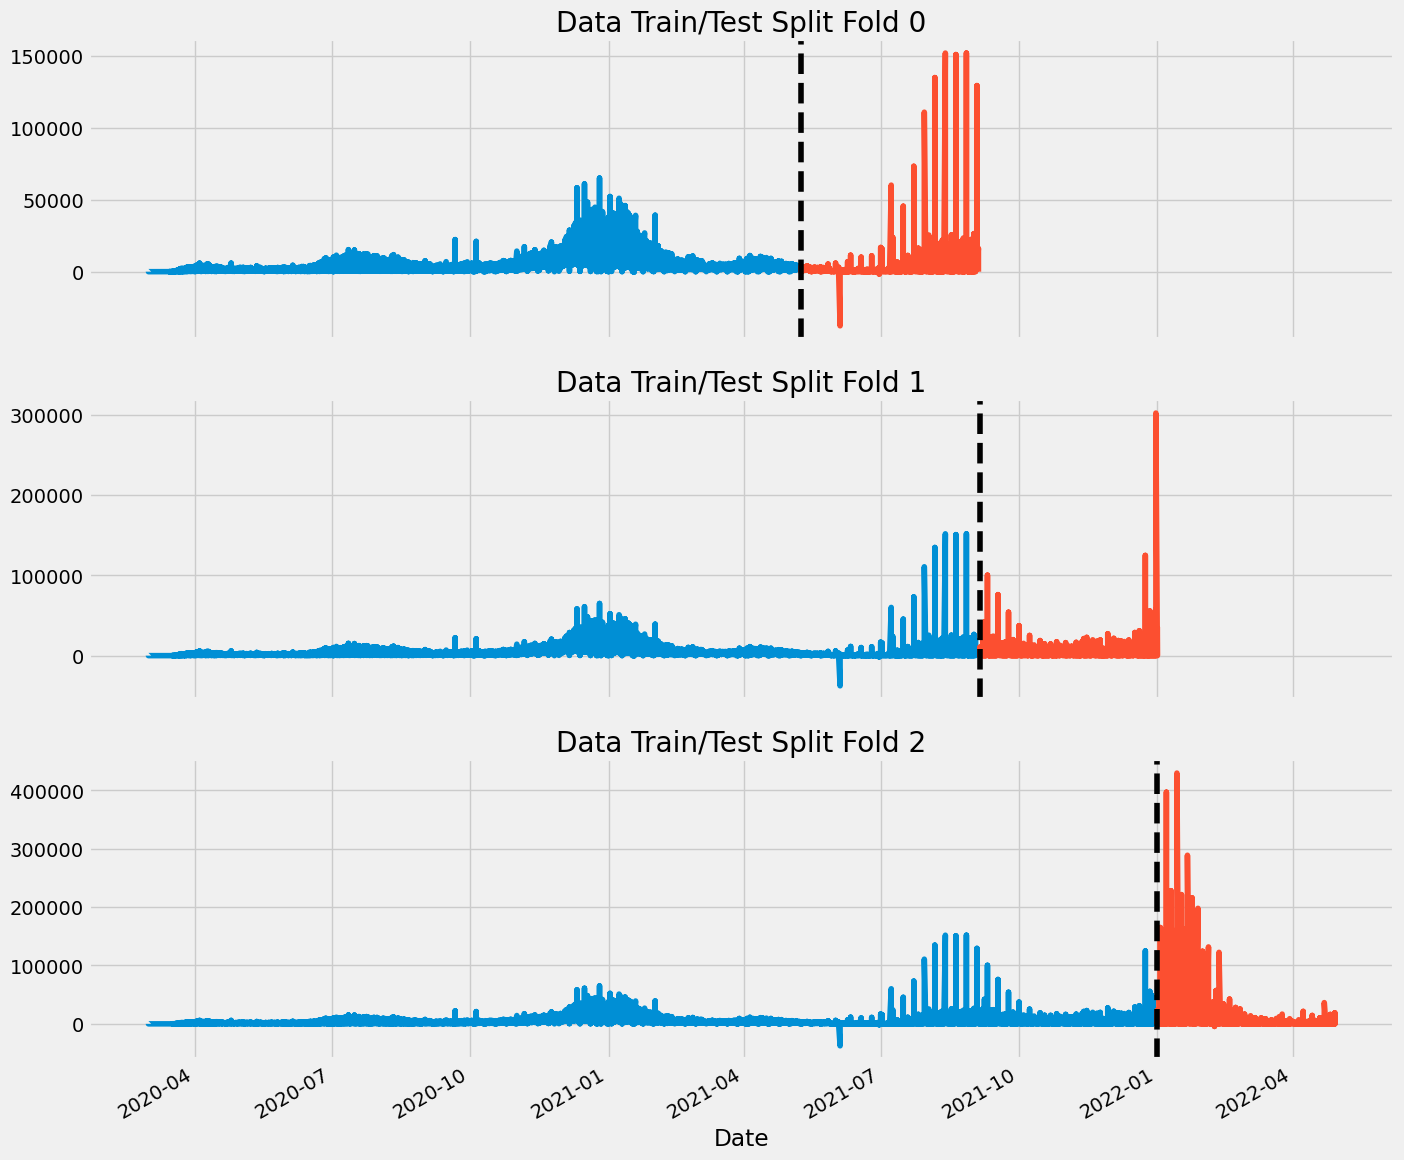

In [74]:
fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df_checkpoint2):
    train = df_checkpoint2.iloc[train_idx]
    test = df_checkpoint2.iloc[val_idx]
    train['PEOPLE_POSITIVE_NEW_CASES_COUNT'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['PEOPLE_POSITIVE_NEW_CASES_COUNT'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [75]:
tss = TimeSeriesSplit(n_splits = 3, test_size = 7900-6900, gap = 24)
df_checkpoint2 = df_checkpoint2.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df_checkpoint2):
    train = df_checkpoint2.iloc[train_idx]
    test = df_checkpoint2.iloc[val_idx]
    TARGET = 'PEOPLE_POSITIVE_NEW_CASES_COUNT'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[0]	validation_0-rmse:9069.18043	validation_1-rmse:31687.22102


/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [03:06:51] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:4646.64230	validation_1-rmse:20066.33401
[157]	validation_0-rmse:3633.54023	validation_1-rmse:19275.48109
[0]	validation_0-rmse:9069.18043	validation_1-rmse:31687.22102


/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [03:06:53] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:4646.64230	validation_1-rmse:20066.33401
[158]	validation_0-rmse:3621.29051	validation_1-rmse:19305.85282
[0]	validation_0-rmse:9069.18043	validation_1-rmse:31687.22102


/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [03:06:55] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:4646.64230	validation_1-rmse:20066.33401
[158]	validation_0-rmse:3621.29051	validation_1-rmse:19305.85282


In [76]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 18923.7315
Fold scores:[18923.731480260118, 18923.731480260118, 18923.731480260118]
